In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data_2015 = pd.read_csv('archive/2015-building-energy-benchmarking.csv')

In [3]:
data_2015.shape

(3340, 47)

In [4]:
data_2016 = pd.read_csv('archive/2016-building-energy-benchmarking.csv')

In [5]:
data_2016.shape

(3376, 46)

In [6]:
pd.set_option('display.max_row', 47)
pd.set_option('display.max_column', 47)

In [7]:
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [8]:
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# 1. Analyse exploratoire

## Objectifs :

* Tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.
* Mettre en place le modèle d'apprentissage supervisé adapté au problème métier
* Évaluer les performances d’un modèle d'apprentissage supervisé
* Adapter les hyperparamètres d'un algorithme d'apprentissage supervisé afin de l'améliorer
* Transformer les variables pertinentes d'un modèle d'apprentissage supervisé
    
## Checklist de base

### Analyse de Forme :

* **variable target > Consommation énergétique** :
    * **2015** : SiteEnergyUse(kBtu) = Electricity(kBtu) + NaturalGas(kBtu)+ OtherFuelUse(kBtu) + SteamUse(kBtu)
    * **2016** : SiteEnergyUse(kBtu) = Electricity(kBtu) + NaturalGas(kBtu) + SteamUse(kBtu)
    
        * avec kBtu : kilo British thermic unit
        
     **Emisssions de GES** : 
    * **2015** : GHGEmissions(MetricTonsCO2e)
    * **2016** : TotalGHGEmissions)
    
* **lignes et colonnes** : 3340, 47 pour 2015 et 3376, 46 pour 2016
* **types de variables** : qualitatives : , quantitatives : 
* **Analyse des valeurs manquantes** :
    * **2015** : 
        * 2010 Census Tracts, City Council Districts, YearsENERGYSTARCertified, Outlier > 90% de NaN
        * Troisième usage principal > 83% de NaN
        * Deuxième usage principal > 53% de NaN
        * ENERGYSTARScore > 23% de NaN
    
    * **2016** :
        * YearsENERGYSTARCertified , Outlier, Comments > 90% de NaN
        * Troisième usage principal > 82% de NaN
        * Deuxième usage principal > 50% de NaN
        * ENERGYSTARScore > 24% de NaN

    
### Analyse de Fond :

* **Visualisation des target** :
     * les targets suivent une distribution asymétrique gauche ; passage à l'échelle logarithmique pour mieux distinguer : les consommations ont l'air de suivre une distribution normale sur cette échelle. Les émissions de GES ont l'air d'avoir au moins 2 modes.
    
    
* **Signification des variables** :
    * **variables qualitatives** : BuildingType : 
        * NonResidential : non résidentiel
        * Nonresidential COS :
        * SPS-District K-12 : Seattle Public School : écoles publiques de Seattle
        * Campus : campus
        * Multifamily LR (1-4) : Résidentiel, Multifamilial, Tour basse
        * Multifamily MR (5-9) : Résidentiel, Multifamilial, Tour intermédiaire
        * Multifamily HR (10+) : Résidentiel, multifamilial, de grande hauteur
    * **booléen** : DefaultData
        * La propriété a utilisé des données par défaut pour au moins une caractéristique de propriété.
    
    * **variables quantitatives** : 
        * YearBuilt : année de construction ou de dernière rénovation
        * PropertyGFATotal : surface totale (bâtiments + parking) en square foot
        * ENERGYSTARScore : projection calculée de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. Un score de 50 représente la médiane nationale.
        * SiteEnergyUseWN(kBtu) : consommation annuelle ajustée à la moyenne des conditions météorologiques sur 30 ans.
 


### Analyse de la forme des données

In [9]:
df_2015 = data_2015.copy()
df_2016 = data_2016.copy()

<AxesSubplot:ylabel='None'>

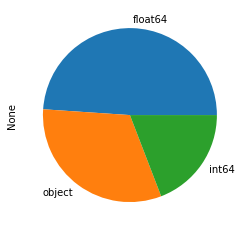

In [10]:
df_2015.dtypes.value_counts().plot.pie()

<AxesSubplot:ylabel='None'>

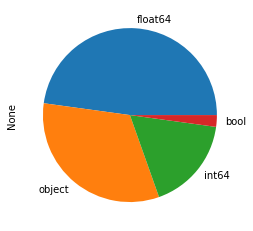

In [11]:
df_2016.dtypes.value_counts().plot.pie()

<AxesSubplot:>

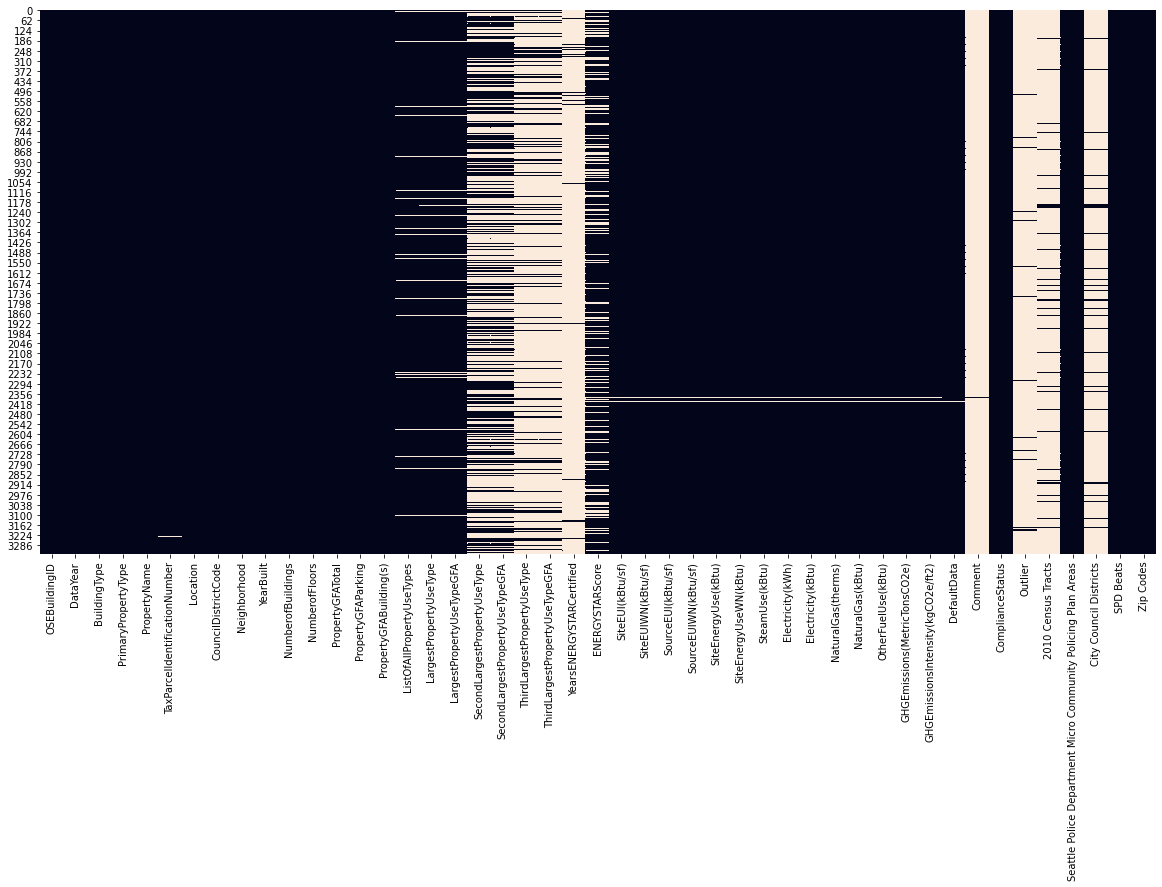

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015.isna(), cbar=False)

<AxesSubplot:>

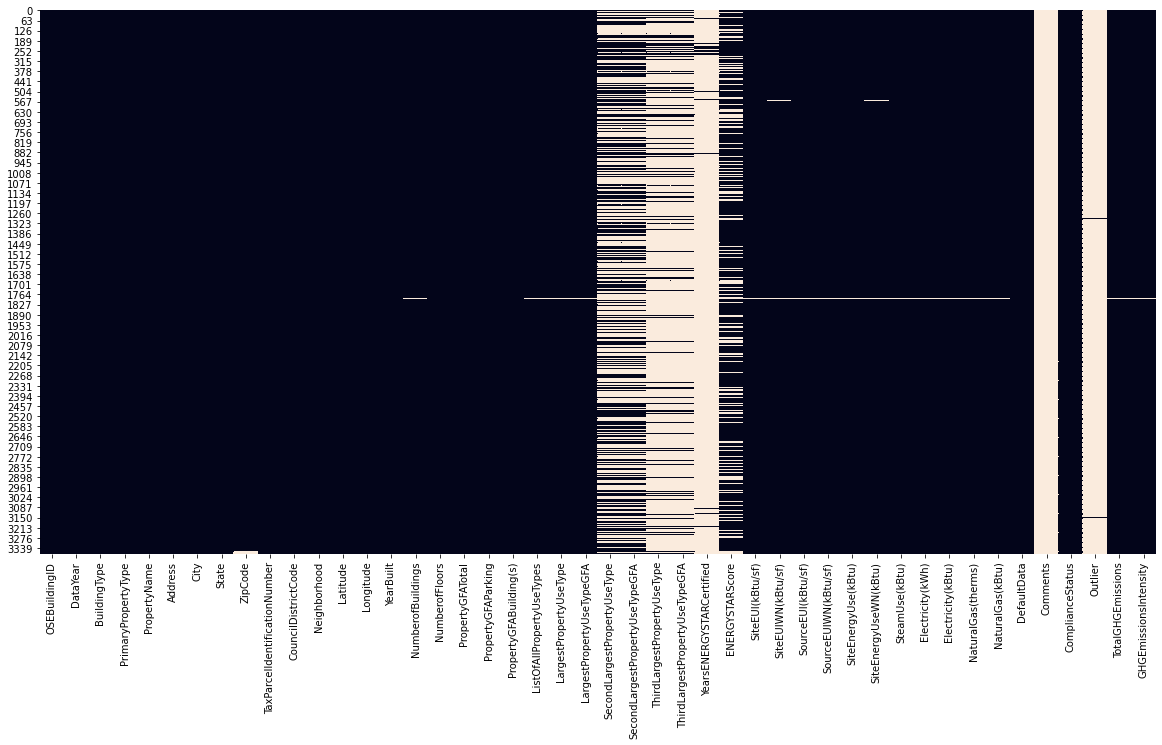

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2016.isna(), cbar=False)

In [14]:
(df_2015.isna().sum()/df_2015.shape[0]).sort_values(ascending=True)

OSEBuildingID                                                    0.000000
ComplianceStatus                                                 0.000000
PropertyGFABuilding(s)                                           0.000000
PropertyGFAParking                                               0.000000
PropertyGFATotal                                                 0.000000
NumberofBuildings                                                0.000000
YearBuilt                                                        0.000000
Neighborhood                                                     0.000000
Zip Codes                                                        0.000000
Location                                                         0.000000
PropertyName                                                     0.000000
PrimaryPropertyType                                              0.000000
BuildingType                                                     0.000000
DataYear                              

In [15]:
(df_2016.isna().sum()/df_2016.shape[0]).sort_values(ascending=True)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

### Analyse du Fond

### 1. Visulation initiale - Elimination des colonnes inutiles

In [16]:
df_2015 = df_2015[df_2015.columns[df_2015.isna().sum()/df_2015.shape[0] <0.1]]
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,14.0,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,14.0,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,56.0,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,56.0,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,56.0,31.0,19576


In [17]:
df_2016 = df_2016[df_2016.columns[df_2016.isna().sum()/df_2016.shape[0] <0.1]]
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,Compliant,505.01,2.88


<AxesSubplot:>

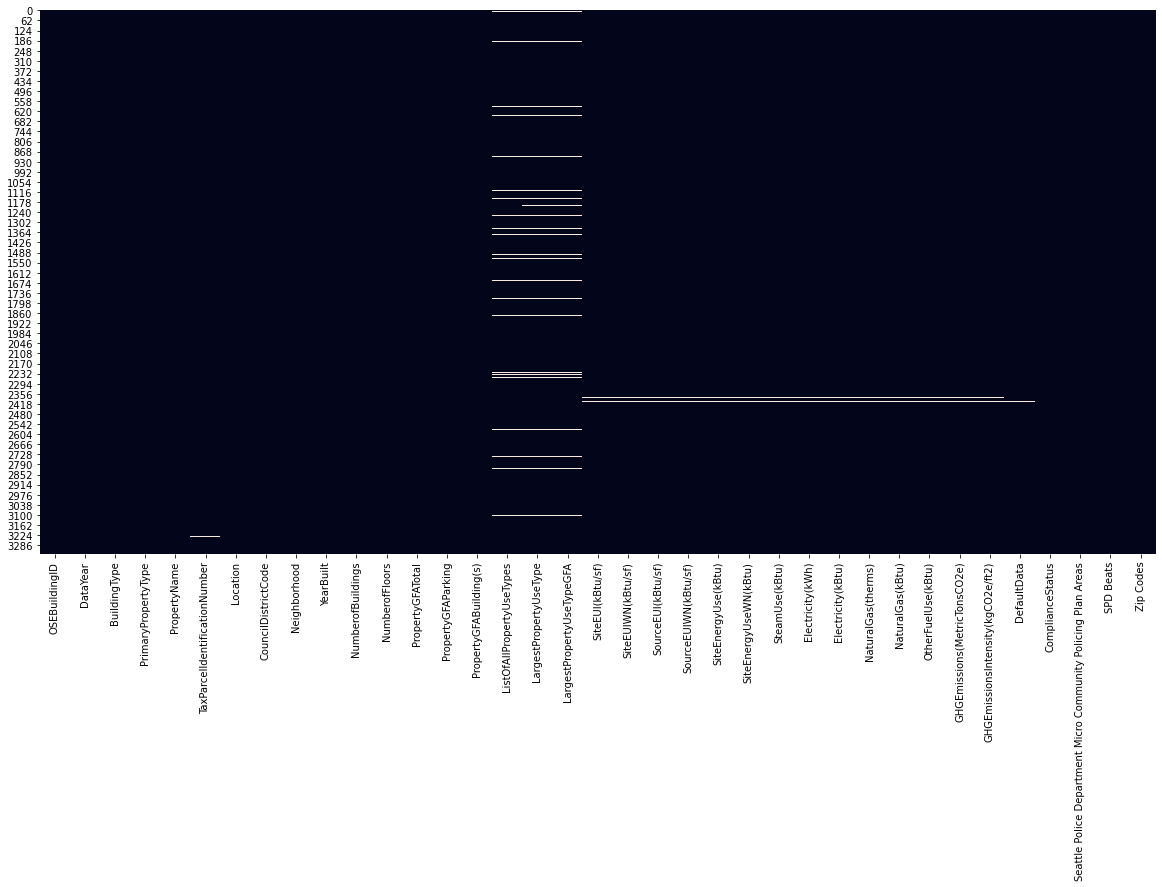

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2015.isna(), cbar=False)

<AxesSubplot:>

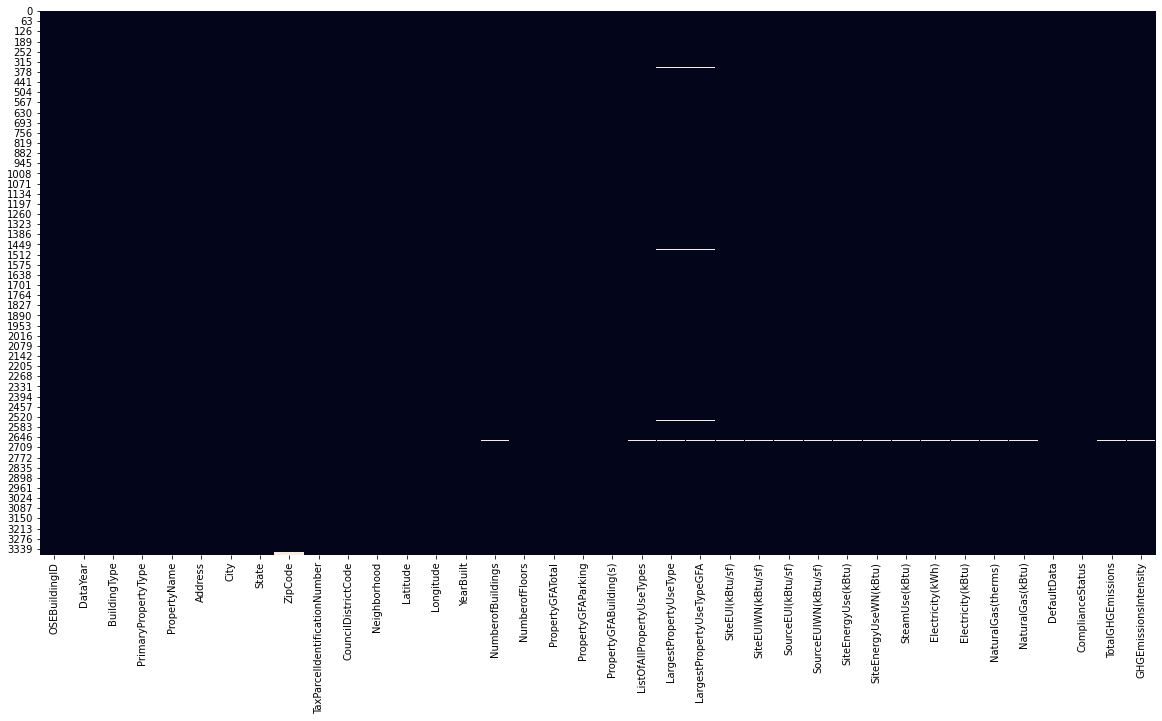

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2016.isna(), cbar=False)

## Examen des colonnes target

In [20]:
target1 = 'SiteEnergyUse(kBtu)'
target2 = 'GHGEmissions(MetricTonsCO2e)'
target3 = 'TotalGHGEmissions'

### Énergie en 2015

<Figure size 1440x864 with 0 Axes>

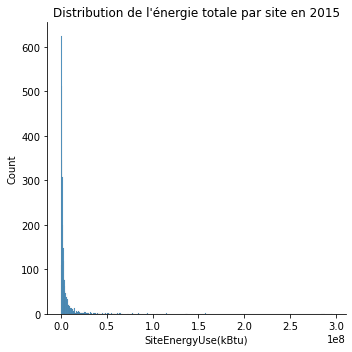

In [21]:
plt.figure(figsize=(20,12))
sns.displot(df_2015[target1])
plt.title('Distribution de l\'énergie totale par site en 2015')
plt.tight_layout()
plt.show()

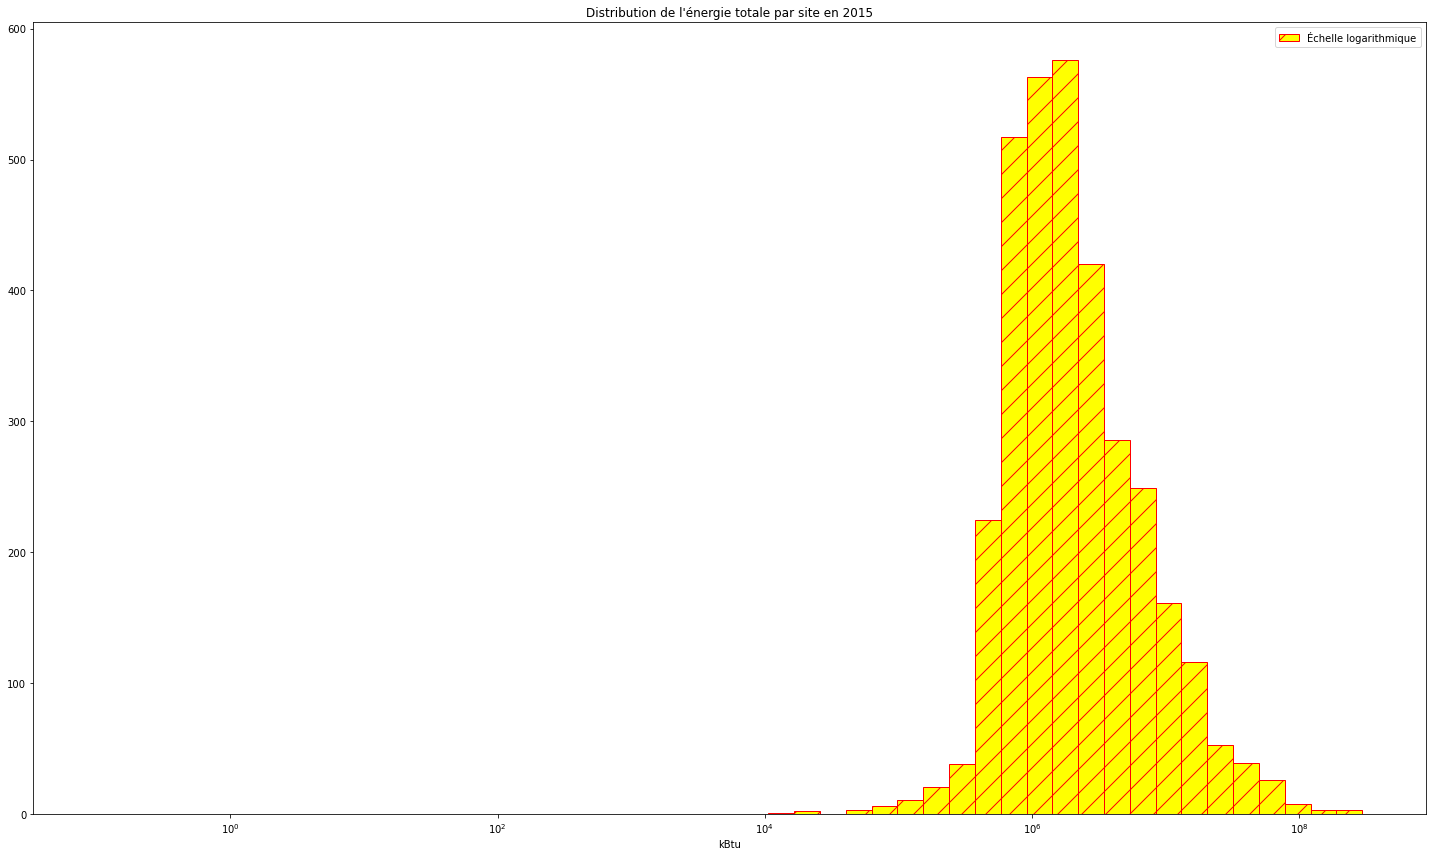

--------------------------------------------------
SiteEnergyUse(kBtu):

moy:
 4983106.046246246
med:
 1776219.0
mod:
 0          0.0
1     767213.0
2     784584.0
3    2074152.0
dtype: float64
var:
 189096522860088.5
ect:
 13751237.13925727
skw:
 12.076222059479122
kur:
 209.54926244403052


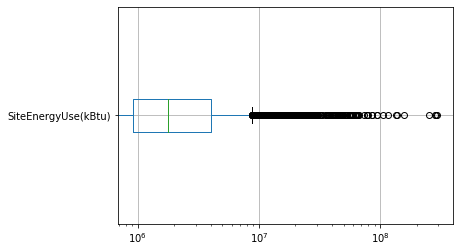

In [22]:
plt.figure(figsize=(20,12))
plt.hist(df_2015[target1].dropna(), 
         bins=np.logspace(np.log10(0.1),
                          np.log10(df_2015[target1].max()), 
                          50),
         color = 'yellow', edgecolor = 'red', hatch = '/', 
         label = 'Échelle logarithmique', histtype = 'bar')
plt.gca().set_xscale("log")
plt.xlabel('kBtu')
plt.title('Distribution de l\'énergie totale par site en 2015')
plt.legend()
plt.tight_layout()
plt.show()

print('-'*50)

print(target1+':\n')
print("moy:\n",df_2015[target1].mean())
print("med:\n",df_2015[target1].median())
print("mod:\n",df_2015[target1].mode())
print("var:\n",df_2015[target1].var(ddof=0))
print("ect:\n",df_2015[target1].std(ddof=0))
print("skw:\n",df_2015[target1].skew())
print("kur:\n",df_2015[target1].kurtosis())
df_2015.boxplot(column=target1, vert=False)
plt.xscale('log')
plt.show()

### Énergie en 2016

<Figure size 1440x864 with 0 Axes>

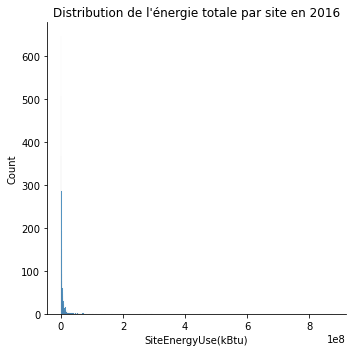

In [23]:
plt.figure(figsize=(20,12))
sns.displot(df_2016[target1])
plt.title('Distribution de l\'énergie totale par site en 2016')
plt.tight_layout()
plt.show()

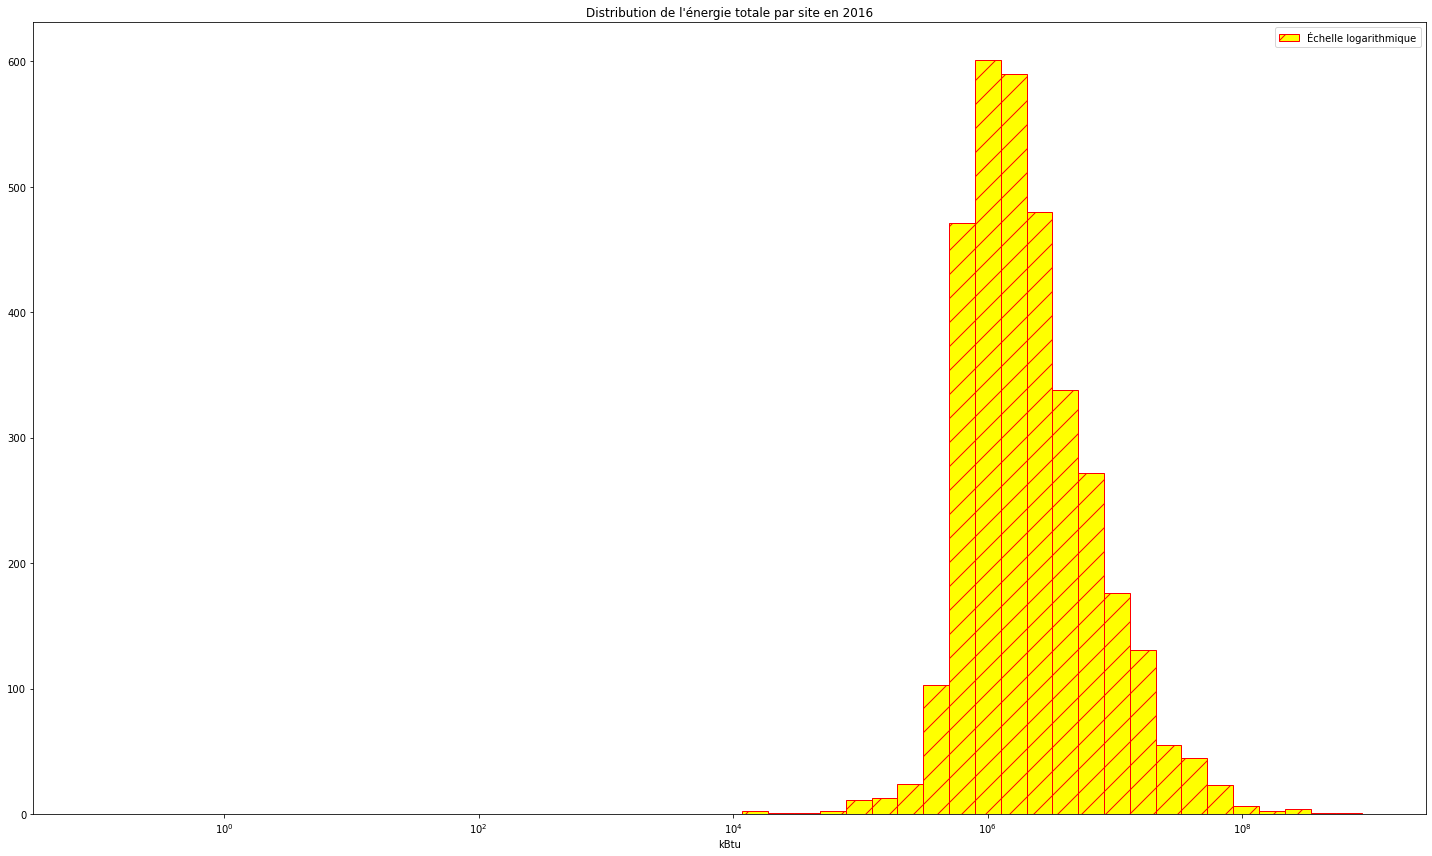

--------------------------------------------------
SiteEnergyUse(kBtu):

moy:
 5403667.294533333
med:
 1803753.25
mod:
 0    0.0
dtype: float64
var:
 466880729405922.1
ect:
 21607423.01631368
skw:
 24.841979274412715
kur:
 858.6184814442017


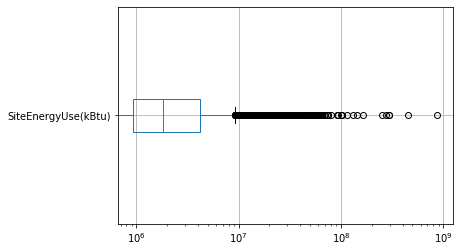

In [24]:
plt.figure(figsize=(20,12))
plt.hist(df_2016[target1].dropna(), 
         bins=np.logspace(np.log10(0.1),
                          np.log10(df_2016[target1].max()), 
                          50),
         color = 'yellow', edgecolor = 'red', hatch = '/', 
         label = 'Échelle logarithmique', histtype = 'bar')
plt.gca().set_xscale("log")
plt.xlabel('kBtu')
plt.title('Distribution de l\'énergie totale par site en 2016')
plt.legend()
plt.tight_layout()
plt.show()

print('-'*50)

print(target1+':\n')
print("moy:\n",df_2016[target1].mean())
print("med:\n",df_2016[target1].median())
print("mod:\n",df_2016[target1].mode())
print("var:\n",df_2016[target1].var(ddof=0))
print("ect:\n",df_2016[target1].std(ddof=0))
print("skw:\n",df_2016[target1].skew())
print("kur:\n",df_2016[target1].kurtosis())
df_2016.boxplot(column=target1, vert=False)
plt.xscale('log')
plt.show()

### Émissions de GHG en 2015

<Figure size 1440x864 with 0 Axes>

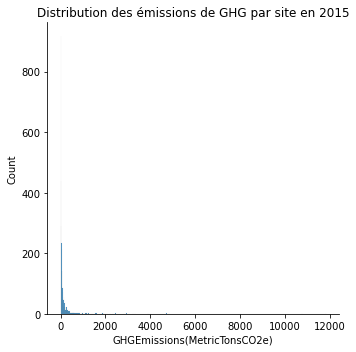

In [25]:
plt.figure(figsize=(20,12))
sns.displot(df_2015[target2])
plt.title('Distribution des émissions de GHG par site en 2015')
plt.tight_layout()
plt.show()

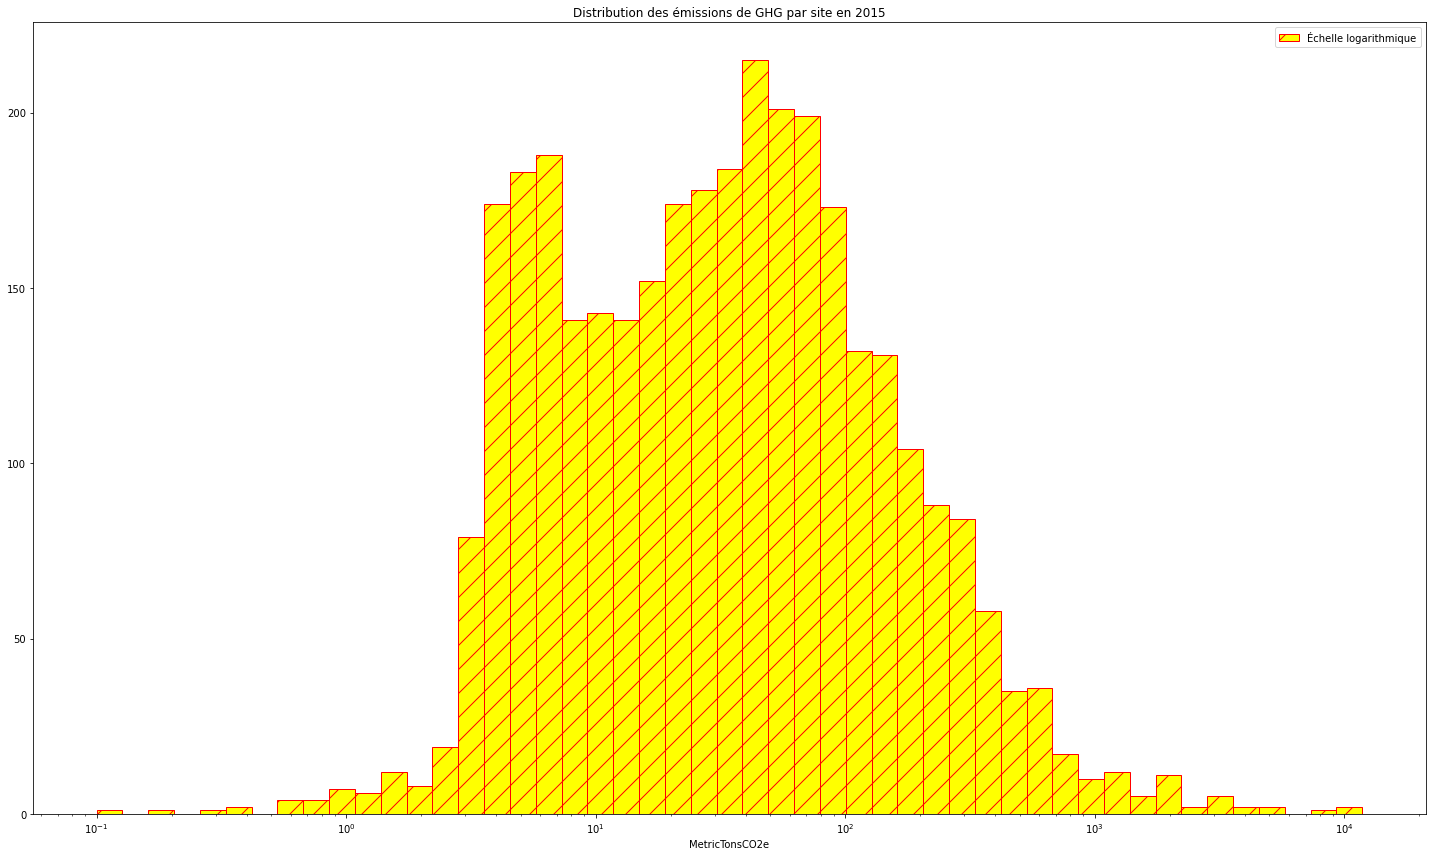

--------------------------------------------------
SiteEnergyUse(kBtu):

moy:
 110.09410210210189
med:
 32.739999999999995
mod:
 0    4.65
dtype: float64
var:
 167599.1042905001
ect:
 409.3886958508993
skw:
 17.12182145387647
kur:
 401.5285195958327


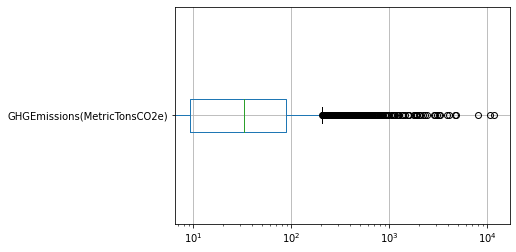

In [26]:
plt.figure(figsize=(20,12))
plt.hist(df_2015[target2].dropna(), 
         bins=np.logspace(np.log10(0.1),
                          np.log10(df_2015[target2].max()), 
                          50),
         color = 'yellow', edgecolor = 'red', hatch = '/', 
         label = 'Échelle logarithmique', histtype = 'bar')
plt.gca().set_xscale("log")
plt.xlabel('MetricTonsCO2e')
plt.title('Distribution des émissions de GHG par site en 2015')
plt.legend()
plt.tight_layout()
plt.show()

print('-'*50)

print(target1+':\n')
print("moy:\n",df_2015[target2].mean())
print("med:\n",df_2015[target2].median())
print("mod:\n",df_2015[target2].mode())
print("var:\n",df_2015[target2].var(ddof=0))
print("ect:\n",df_2015[target2].std(ddof=0))
print("skw:\n",df_2015[target2].skew())
print("kur:\n",df_2015[target2].kurtosis())
df_2015.boxplot(column=target2, vert=False)
plt.xscale('log')
plt.show()

### Émissions de GHG en 2016

<Figure size 1440x864 with 0 Axes>

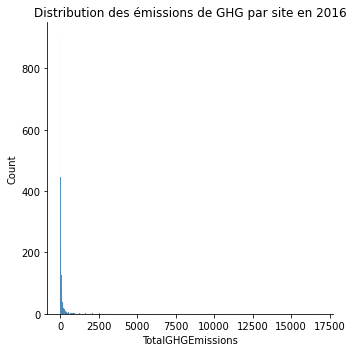

In [27]:
plt.figure(figsize=(20,12))
sns.displot(df_2016[target3])
plt.title('Distribution des émissions de GHG par site en 2016')
plt.tight_layout()
plt.show()

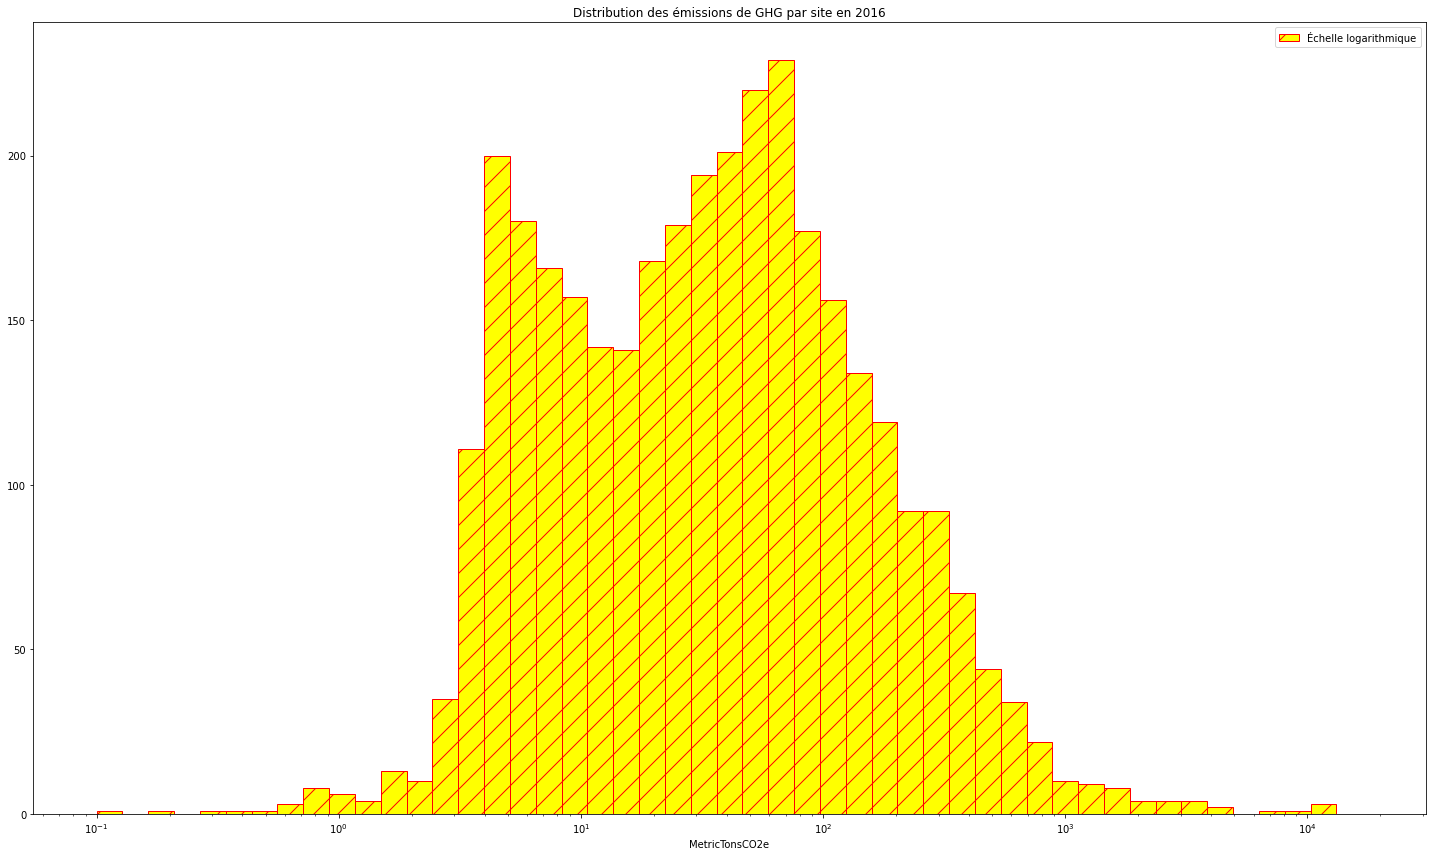

--------------------------------------------------
SiteEnergyUse(kBtu):

moy:
 119.72397089397079
med:
 33.92
mod:
 0    0.0
dtype: float64
var:
 290253.9372061202
ect:
 538.752203899084
skw:
 19.481874921458164
kur:
 474.89222328895323


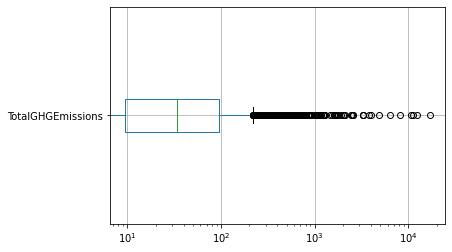

In [28]:
plt.figure(figsize=(20,12))
plt.hist(df_2016[target3].dropna(), 
         bins=np.logspace(np.log10(0.1),
                          np.log10(df_2016[target3].max()), 
                          50),
         color = 'yellow', edgecolor = 'red', hatch = '/', 
         label = 'Échelle logarithmique', histtype = 'bar')
plt.gca().set_xscale("log")
plt.xlabel('MetricTonsCO2e')
plt.title('Distribution des émissions de GHG par site en 2016')
plt.legend()
plt.tight_layout()
plt.show()

print('-'*50)

print(target1+':\n')
print("moy:\n",df_2016[target3].mean())
print("med:\n",df_2016[target3].median())
print("mod:\n",df_2016[target3].mode())
print("var:\n",df_2016[target3].var(ddof=0))
print("ect:\n",df_2016[target3].std(ddof=0))
print("skw:\n",df_2016[target3].skew())
print("kur:\n",df_2016[target3].kurtosis())
df_2016.boxplot(column=target3, vert=False)
plt.xscale('log')
plt.show()

## Variables qualitatives

In [29]:
df_2015.select_dtypes('object').nunique()

BuildingType                        7
PrimaryPropertyType                27
PropertyName                     3287
TaxParcelIdentificationNumber    3245
Location                         3298
Neighborhood                       13
ListOfAllPropertyUseTypes         442
LargestPropertyUseType             56
DefaultData                         2
ComplianceStatus                    2
dtype: int64

In [30]:
df_2016.select_dtypes('object').nunique()

BuildingType                        8
PrimaryPropertyType                24
PropertyName                     3362
Address                          3354
City                                1
State                               1
TaxParcelIdentificationNumber    3268
Neighborhood                       19
ListOfAllPropertyUseTypes         466
LargestPropertyUseType             56
ComplianceStatus                    4
dtype: int64

### 'BuildingType'

La variable 'BuildingType' va nous permettre de cibler les bâtiments liés à la problématique, i.e. les bâtiments non résidentiels.
Cependant, on s'aperçoit qu'il y a un type en plus pour l'année 2016.

In [31]:
df_2015['BuildingType'].value_counts()

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

In [32]:
df_2016['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

Le type de bâtiment présent en 2016 mais pas en 2015 est le type 'Nonresidential WA'.
On peut soit supprimer cette ligne, soit la considérer comme un bâtiment 'Nonresidential'.

In [33]:
df_2016.loc[df_2016['BuildingType'] == 'Nonresidential WA','BuildingType'] = 'NonResidential'

In [34]:
df_2016['BuildingType'].value_counts()

NonResidential          1461
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Name: BuildingType, dtype: int64

## Création de sous-ensembles

In [35]:
building_type_2015 = df_2015['BuildingType'].unique().tolist()

In [36]:
building_type_2016 = df_2016['BuildingType'].unique().tolist()

In [37]:
df_2015.duplicated().sum()

0

In [38]:
df_2016.duplicated().sum()

0

In [39]:
residentiel_2015 = [s for s in building_type_2015 if 'Multifamily' in s]
residentiel_2015

['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

In [40]:
residentiel_2016 = [s for s in building_type_2016 if 'Multifamily' in s]
residentiel_2016

['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

In [41]:
building_type_2015 = list(sorted(set(building_type_2015).difference(residentiel_2015)))
building_type_2015

['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12']

In [42]:
building_type_2016 = list(sorted(set(building_type_2016).difference(residentiel_2016)))
building_type_2016

['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12']

In [43]:
df_2015 = df_2015[df_2015['BuildingType'].isin(building_type_2015)]
df_2016 = df_2016[df_2016['BuildingType'].isin(building_type_2016)]

### Autres variables quantitatives

In [44]:
df_2015.shape

(1650, 37)

In [45]:
df_2016.shape

(1668, 38)

In [46]:
df_2015.select_dtypes('object').nunique()

BuildingType                        4
PrimaryPropertyType                25
PropertyName                     1611
TaxParcelIdentificationNumber    1580
Location                         1613
Neighborhood                       13
ListOfAllPropertyUseTypes         352
LargestPropertyUseType             56
DefaultData                         2
ComplianceStatus                    1
dtype: int64

In [47]:
df_2016.select_dtypes('object').nunique()

BuildingType                        4
PrimaryPropertyType                22
PropertyName                     1664
Address                          1647
City                                1
State                               1
TaxParcelIdentificationNumber    1587
Neighborhood                       19
ListOfAllPropertyUseTypes         373
LargestPropertyUseType             56
ComplianceStatus                    4
dtype: int64

Les variables 'City' et 'State', ne sont pas vraiment des variables car elles ne prennent qu'une seule valeur chacune, et de plus, elles ne sont présentes que pour le dataset de 2016.
Ces 2 colonnes seront donc supprimées.
À l'inverse, les variables 'PropertyName', 'TaxParcelIdentificationNumber', 'Location' et 'Address' prennent presquent autant de valeur qu'il y a de données.
Pour notre problématique, elles ne seront pas utiles.

In [48]:
df_2015 = df_2015.drop(['PropertyName', 'TaxParcelIdentificationNumber', 'Location'], axis=1)
df_2015.shape

(1650, 34)

In [49]:
df_2016 = df_2016.drop(['PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber',], axis=1)
df_2016.shape

(1668, 33)

In [50]:
sorted(df_2015.select_dtypes('object').columns.tolist())

['BuildingType',
 'ComplianceStatus',
 'DefaultData',
 'LargestPropertyUseType',
 'ListOfAllPropertyUseTypes',
 'Neighborhood',
 'PrimaryPropertyType']

In [51]:
sorted(df_2016.select_dtypes('object').columns.tolist())

['BuildingType',
 'ComplianceStatus',
 'LargestPropertyUseType',
 'ListOfAllPropertyUseTypes',
 'Neighborhood',
 'PrimaryPropertyType']

La variable qualitative 'DefaultData' n'est présente qu'en 2015.
C'est un booléen qui indique si la propriété a utilisé des données par défaut pour au moins une caractéristique.

<AxesSubplot:ylabel='DefaultData'>

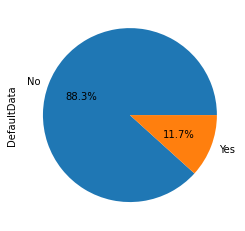

In [52]:
df_2015['DefaultData'].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

Le but étant de prédire à partir de données réelles, cette variable sera supprimée, d'autant plus que la perte de données reste acceptable.

<AxesSubplot:ylabel='DefaultData'>

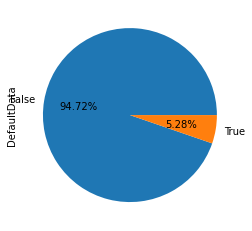

In [53]:
df_2016['DefaultData'].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

In [54]:
df_2015 = df_2015.drop('DefaultData', axis=1)
df_2015.shape

(1650, 33)

In [55]:
df_2016 = df_2016.drop('DefaultData', axis=1)
df_2016.shape

(1668, 32)

# Feature Engineering

## Types de bâtiments + précis

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

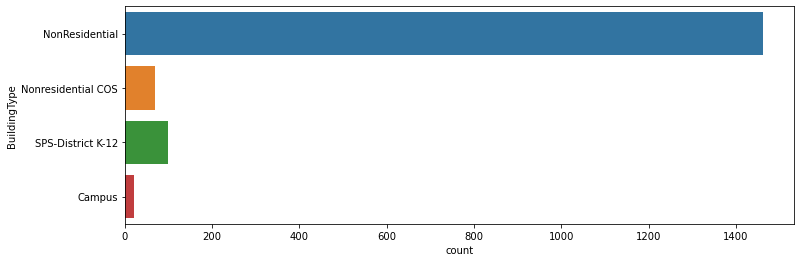

In [56]:
plt.figure(figsize=(12,4))
sns.countplot(y=df_2015['BuildingType'])

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

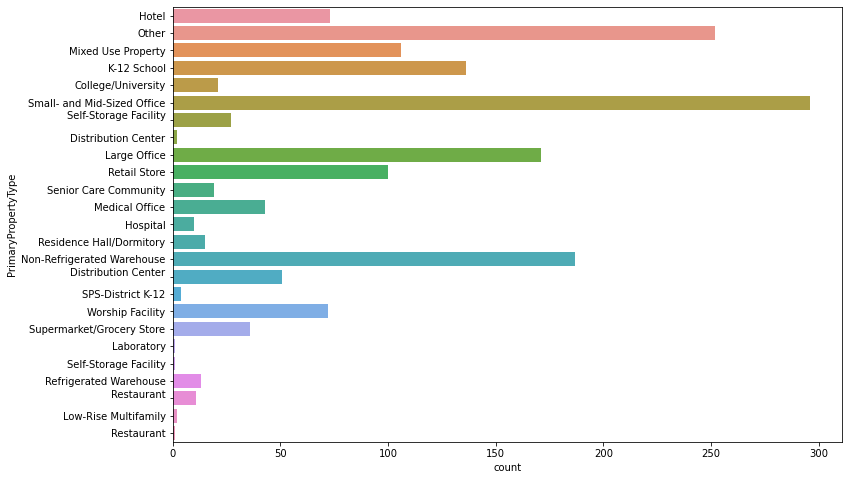

In [57]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_2015['PrimaryPropertyType'])

<AxesSubplot:xlabel='count', ylabel='LargestPropertyUseType'>

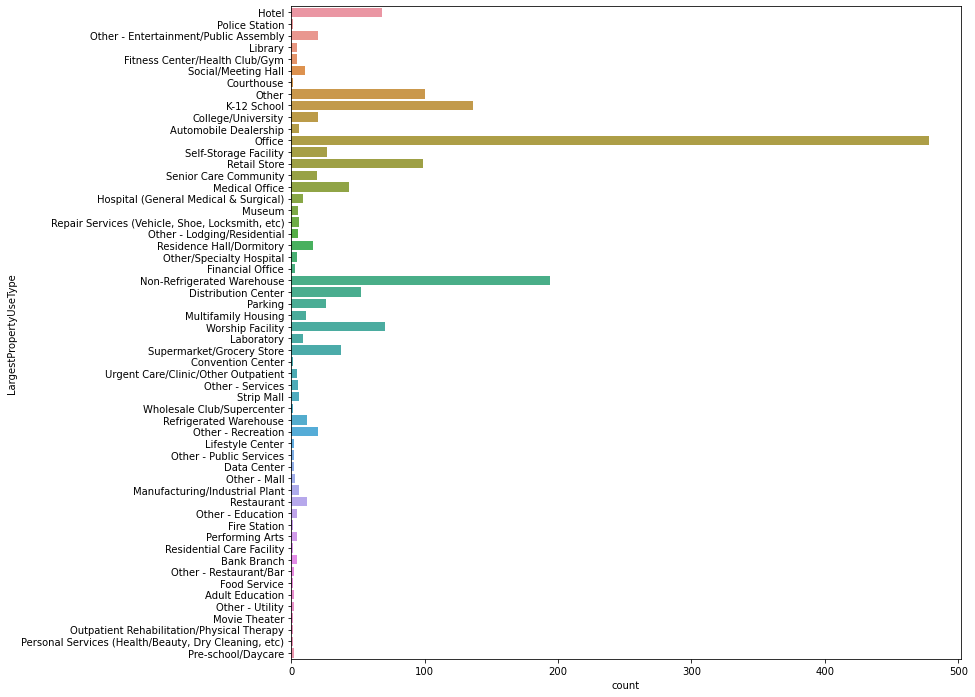

In [58]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2015['LargestPropertyUseType'])

<AxesSubplot:xlabel='count', ylabel='BuildingType'>

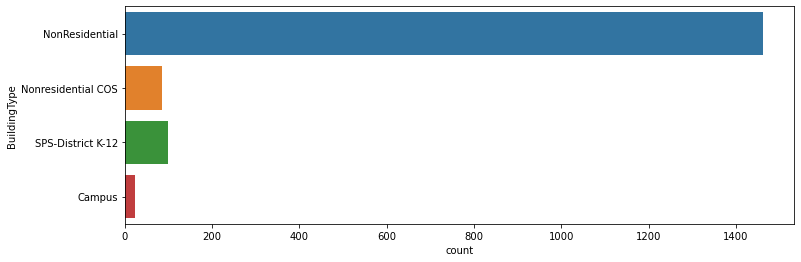

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(y=df_2016['BuildingType'])

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

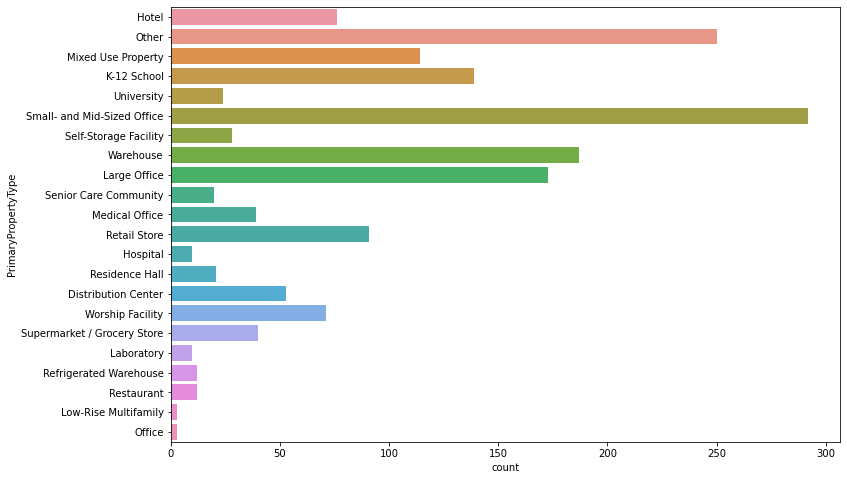

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(y=df_2016['PrimaryPropertyType'])

<AxesSubplot:xlabel='count', ylabel='LargestPropertyUseType'>

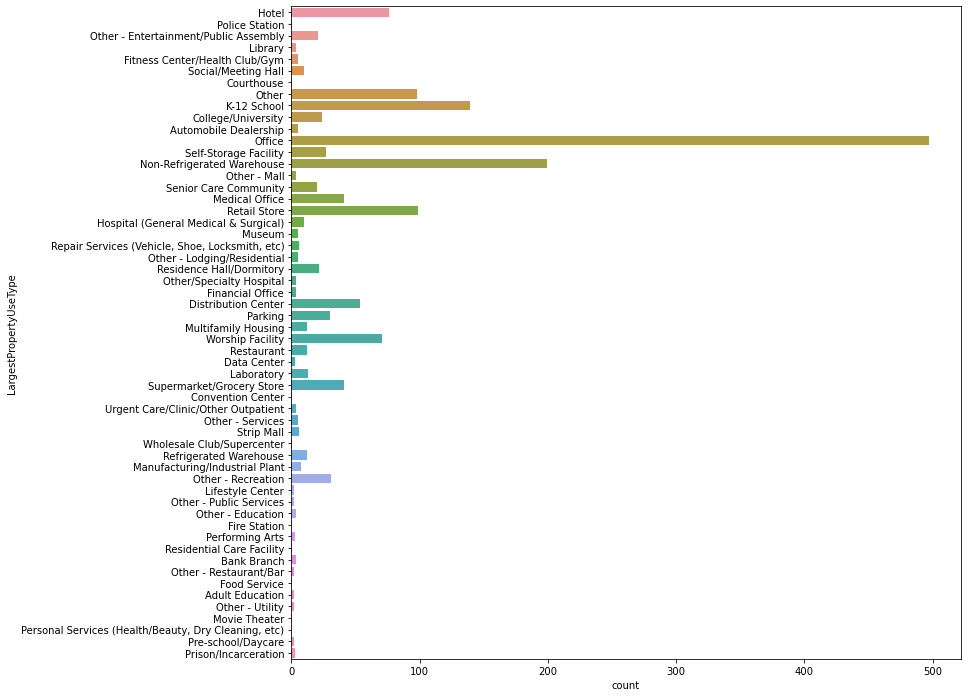

In [61]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2016['LargestPropertyUseType'])

Cette dernière classification de l'usage des propriétés est trop sélective car il n'y a pas assez de données pour beaucoup de catégories.
À l'inverse, la variable 'BuildingType' ne donne plus que 4 catégories différentes.

Assurons nous d'avoir les mêmes valeurs prises par les deux datasets.

In [62]:
def Map_UseType(df,features):

    mapping_property_type={'Hotel':'Housing',
                       'Multifamily Housing':'Housing',
                       'Senior Care Community':'Housing',
                       'Other - Lodging/Residential':'Housing',
                       'Residence Hall/Dormitory':'Housing', 
                       'Other - Lodging/Residential':'Housing',
                       'Residence Hall/Dormitory':'Housing',
                       'Residential Care Facility':'Housing',
                       'Mid-Rise Multifamily':'Housing',
                       'Low-Rise Multifamily':'Housing',
                       'High-Rise Multifamily':'Housing',
                       'Residence Hall':'Housing',

                       'Police Station':'Other',
                       'Courthouse':'Other',
                       'Other':'Other',
                       'Parking':'Other',
                       'Worship Facility':'Other',
                       'Other - Utility':'Other',
                       'Fire Station':'Other',
                       'Mixed Use Property':'Other',
                       'Prison/Incarceration':'Other',

                       'Other - Entertainment/Public Assembly':'Leisure',
                       'Library':'Leisure',
                       'Fitness Center/Health Club/Gym':'Leisure',
                       'Social/Meeting Hall':'Leisure',
                       'Museum':'Leisure',
                       'Other - Recreation':'Leisure',
                       'Restaurant':'Leisure',
                       'Performing Arts':'Leisure',
                       'Other - Restaurant/Bar':'Leisure',
                       'Food Service':'Leisure',
                       'Movie Theater':'Leisure',
                       'Swimming Pool':'Leisure',
                       'Restaurant\n':'Leisure',
                       'Bar/Nightclub':'Leisure',
       
        
                       'K-12 School':'Institution',
                       'College/University':'Institution',
                       'Other - Education':'Institution',
                       'Pre-school/Daycare':'Institution',           
                       'Vocational School':'Institution',
                       'Adult Education':'Institution',
                       'SPS-District K-12':'Institution',
                       'University':'Institution',
                       
                       
                       'Automobile Dealership':'business storage',
                       'Self-Storage Facility':'business storage',
                       'Retail Store':'business storage',
                       'Non-Refrigerated Warehouse':'business storage',
                       'Distribution Center':'business storage',
                       'Supermarket/Grocery Store':'business storage',
                       'Strip Mall':'business storage',
                       'Wholesale Club/Supercenter':'business storage',
                       'Refrigerated Warehouse':'business storage',
                       'Lifestyle Center':'business storage',
                       'Other - Mall':'business storage',
                       'Manufacturing/Industrial Plant':'business storage',
                       'Convenience Store without Gas Station':'business storage',
                       'Food Sales':'business storage',
                       'Enclosed Mall':'business storage',
                       'Self-Storage Facility\n':'business storage',
                       'Distribution Center\n':'business storage',
                       'Warehouse':'business storage',
                       'Supermarket / Grocery Store':'business storage',
                       
                       
                       
                       'Medical Office':'Health',
                       'Hospital (General Medical & Surgical)':'Health',
                       'Other/Specialty Hospital':'Health',
                       'Laboratory':'Health',
                       'Urgent Care/Clinic/Other Outpatient':'Health',
                       'Outpatient Rehabilitation/Physical Therapy':'Health',
                       'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Health',
                       'Hospital':'Health',
                       
                       
                       'Financial Office':'Office',
                       'Repair Services (Vehicle, Shoe, Locksmith, etc)':'Office',
                       'Convention Center':'Office',
                       'Office':'Office',
                       'Other - Services':'Office',
                       'Other - Public Services':'Office',
                       'Data Center':'Office',
                       'Bank Branch':'Office',
                       'Small- and Mid-Sized Office':'Office',
                       'Large Office':'Office'
        }
  
  

    for col in features:
        df[col]=df[col].map(mapping_property_type)

    return df  

In [63]:
Map_UseType(df_2015,['LargestPropertyUseType'])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Housing,88434.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,Compliant,14.0,31.0,18081
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Housing,83880.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,Compliant,14.0,31.0,18081
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Housing,757243.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Compliant,56.0,31.0,18081
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Housing,61320.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,Compliant,56.0,31.0,18081
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Housing,123445.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,Compliant,56.0,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,49966,2015,NonResidential,Other,2,SOUTHEAST,2009,1,NaN,40265,0,40265,Pre-school/Daycare,Institution,40265.0,48.6,54.1,120.3,127.2,1957356.0,2176523.0,0.0,391024.0,1334228.0,6232.0,623184.0,0.0,42.40,0.91,Compliant,22.0,37.0,18388
3314,49985,2015,NonResidential,Large Office,7,LAKE UNION,2014,1,6.0,427181,169195,257986,"Office, Parking",Office,427181.0,39.2,40.7,113.0,115.8,16730779.0,17371762.0,0.0,4306088.0,14692982.0,20384.0,2038408.0,0.0,210.69,0.35,Compliant,56.0,7.0,18390
3319,49998,2015,NonResidential,Self-Storage Facility\n,2,SOUTHEAST,2014,1,4.0,101580,14004,87576,Self-Storage Facility,business storage,87576.0,9.7,9.7,27.2,27.2,850568.0,850568.0,0.0,208197.0,710399.0,1402.0,140199.0,0.0,12.40,0.09,Compliant,38.0,42.0,17919
3322,50002,2015,NonResidential,Other,4,NORTHEAST,2014,1,3.0,33648,84198,-50550,"Automobile Dealership, Parking",Other,83600.0,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,0.0,9.69,0.11,Compliant,60.0,38.0,18383


<AxesSubplot:xlabel='count', ylabel='LargestPropertyUseType'>

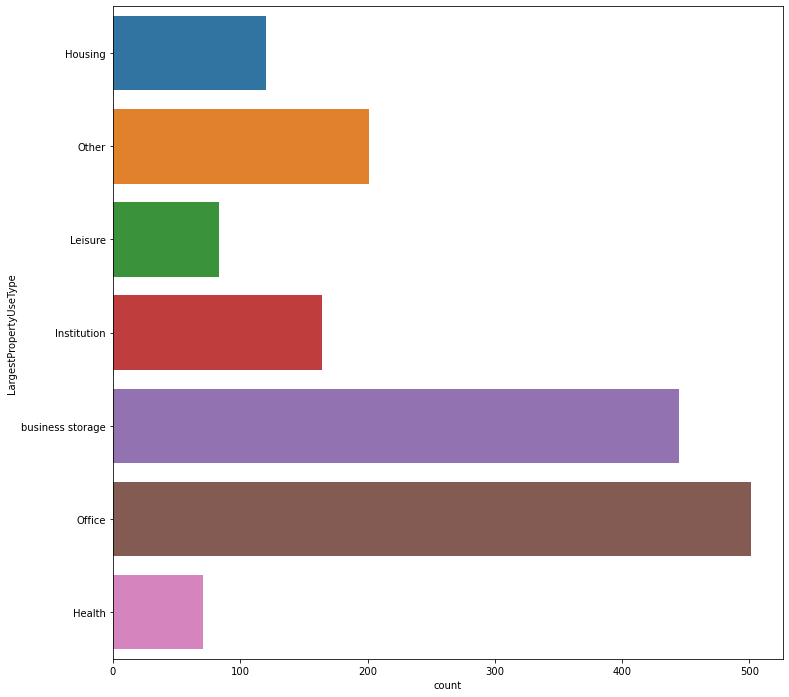

In [64]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2015['LargestPropertyUseType'])

In [65]:
Map_UseType(df_2016,['LargestPropertyUseType'])

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Housing,88434.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Housing,83880.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Housing,756493.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Housing,61320.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Housing,123445.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,NaN,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,NaN,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Leisure,16000.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Leisure,7583.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,NaN,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Leisure,6601.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57


<AxesSubplot:xlabel='count', ylabel='LargestPropertyUseType'>

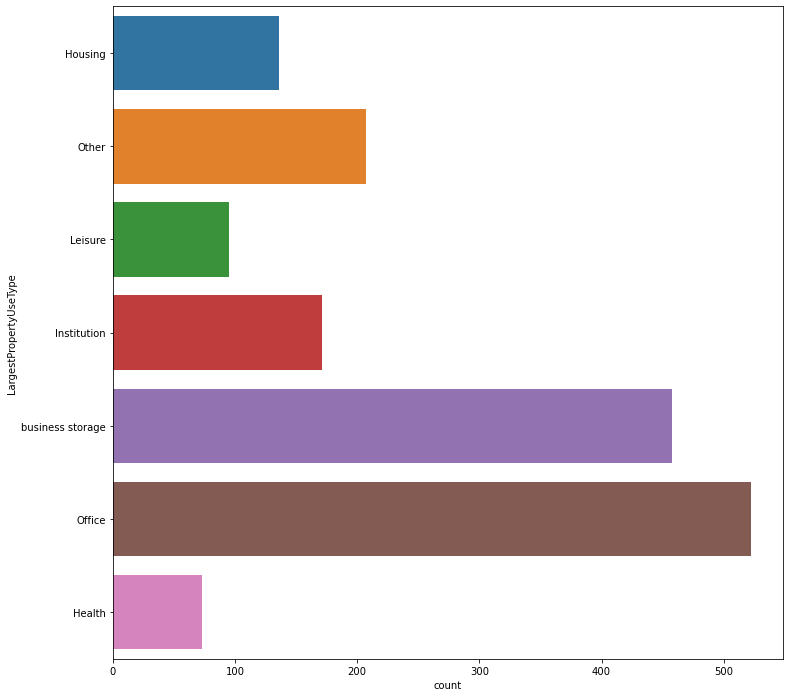

In [66]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2016['LargestPropertyUseType'])

On s'aperçoit que dans les sous-catégories, il y a encore des bâtiments dont l'usage principal est résidentiel.

### Autre possibilité de sous-catégorie

In [67]:
sorted(df_2015['PrimaryPropertyType'].unique().tolist())

['College/University',
 'Distribution Center',
 'Distribution Center\n',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Restaurant\n',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Self-Storage Facility\n',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'Worship Facility']

On s'aperçoit qu'il y a des valeurs mal gérés avec '\n'.

In [68]:
df_2015.loc[df_2015['PrimaryPropertyType'] == 'Distribution Center\n', 
            'PrimaryPropertyType'] = 'Distribution Center'

df_2015.loc[df_2015['PrimaryPropertyType'] == 'Restaurant\n', 
            'PrimaryPropertyType'] = 'Restaurant'

df_2015.loc[df_2015['PrimaryPropertyType'] == 'Self-Storage Facility\n', 
            'PrimaryPropertyType'] = 'Self-Storage Facility'

In [69]:
sorted(df_2015['PrimaryPropertyType'].unique().tolist())

['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'Worship Facility']

In [70]:
sorted(df_2016['PrimaryPropertyType'].unique().tolist())

['Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

In [71]:
type_2015 = sorted(df_2015['PrimaryPropertyType'].unique().tolist())
type_2015

['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'Worship Facility']

In [72]:
type_2016 = sorted(df_2016['PrimaryPropertyType'].unique().tolist())
type_2016

['Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

In [73]:
len(list(set(type_2015) & set(type_2016)))

17

In [74]:
list(set(type_2015) & set(type_2016))

['Restaurant',
 'Large Office',
 'Retail Store',
 'Other',
 'Small- and Mid-Sized Office',
 'Medical Office',
 'K-12 School',
 'Hotel',
 'Senior Care Community',
 'Hospital',
 'Refrigerated Warehouse',
 'Distribution Center',
 'Self-Storage Facility',
 'Laboratory',
 'Worship Facility',
 'Mixed Use Property',
 'Low-Rise Multifamily']

In [75]:
diff_2015 = list(set(type_2015) - set(type_2016))
diff_2015

['Non-Refrigerated Warehouse',
 'College/University',
 'SPS-District K-12',
 'Residence Hall/Dormitory',
 'Supermarket/Grocery Store']

In [76]:
diff_2016 = list(set(type_2016) - set(type_2015))
diff_2016

['Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Residence Hall']

In [77]:
df_2015[df_2015['PrimaryPropertyType'] == 'Supermarket/Grocery Store'].shape[0]

36

In [78]:
for valeur in diff_2015:
    print(f'{valeur:-<50}', df_2015[df_2015['PrimaryPropertyType'] == valeur].shape[0])

Non-Refrigerated Warehouse------------------------ 187
College/University-------------------------------- 21
SPS-District K-12--------------------------------- 4
Residence Hall/Dormitory-------------------------- 15
Supermarket/Grocery Store------------------------- 36


In [79]:
type_2015

['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Non-Refrigerated Warehouse',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall/Dormitory',
 'Restaurant',
 'Retail Store',
 'SPS-District K-12',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'Worship Facility']

In [80]:
for valeur in diff_2016:
    print(f'{valeur:-<50}', df_2016[df_2016['PrimaryPropertyType'] == valeur].shape[0])

Office-------------------------------------------- 3
Supermarket / Grocery Store----------------------- 40
University---------------------------------------- 24
Warehouse----------------------------------------- 187
Residence Hall------------------------------------ 21


'SPS-District K-12' correspond à 'K-12 School'.

'Residence Hall / Dormitory' correspond à 'Residence Hall'.

'Non-Refrigerated Warehouse' correspond à 'Warehouse'.

'College/University' correspond à 'University'.

Nous pouvons inclure les 3 lignes 'Office' en tant que 'Other' car il y a plusieurs catégories contenant 'Office'.

Enfin, nous pouvons rejoindre 'Supermarket / Grocery Store' avec 'Supermarket/Grocery Store'.

In [81]:
df_2015.loc[df_2015['PrimaryPropertyType'] == 'SPS-District K-12', 
            'PrimaryPropertyType'] = 'K-12 School'

df_2015.loc[df_2015['PrimaryPropertyType'] == 'Residence Hall/Dormitory', 
            'PrimaryPropertyType'] = 'Residence Hall'

df_2015.loc[df_2015['PrimaryPropertyType'] == 'Non-Refrigerated Warehouse', 
            'PrimaryPropertyType'] = 'Warehouse'

In [82]:
df_2016.loc[df_2016['PrimaryPropertyType'] == 'University', 
            'PrimaryPropertyType'] = 'College/University'

df_2016.loc[df_2016['PrimaryPropertyType'] == 'Office', 
            'PrimaryPropertyType'] = 'Other'

df_2016.loc[df_2016['PrimaryPropertyType'] == 'Supermarket / Grocery Store', 
            'PrimaryPropertyType'] = 'Supermarket/Grocery Store'

Pour finir, 'Low-Rise Multifamily' correspond à des bâtiments résidentiels.

In [83]:
df_2015.shape

(1650, 33)

In [84]:
df_2016.shape

(1668, 32)

In [85]:
types = sorted(df_2016['PrimaryPropertyType'].unique().tolist())
types.remove('Low-Rise Multifamily')

In [86]:
types

['College/University',
 'Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Medical Office',
 'Mixed Use Property',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket/Grocery Store',
 'Warehouse',
 'Worship Facility']

In [87]:
df_2015 = df_2015[df_2015['PrimaryPropertyType'].isin(types)]
df_2016 = df_2016[df_2016['PrimaryPropertyType'].isin(types)]

In [88]:
df_2015.shape

(1648, 33)

In [89]:
df_2016.shape

(1665, 32)

### 'Neighborhood'

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

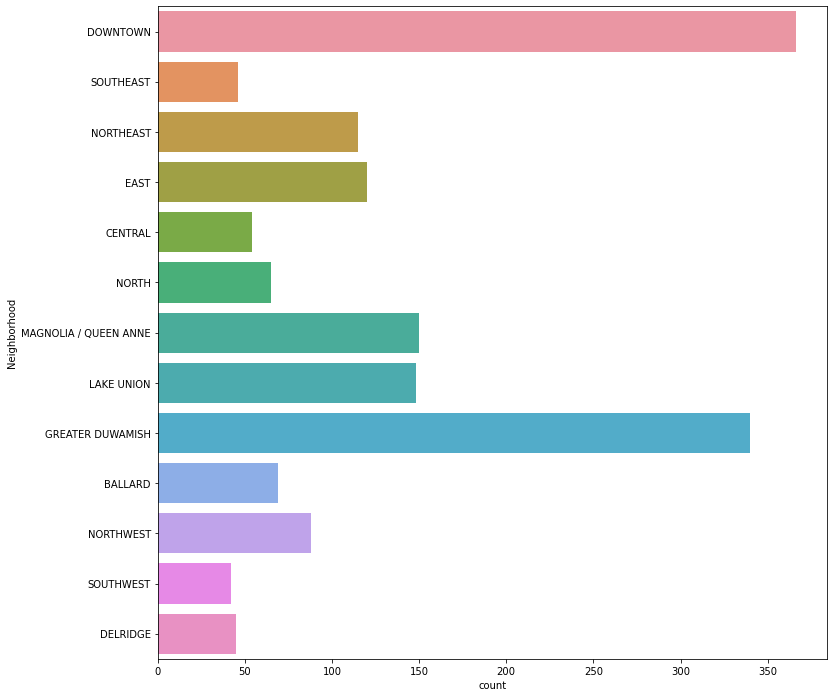

In [90]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2015['Neighborhood'])

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

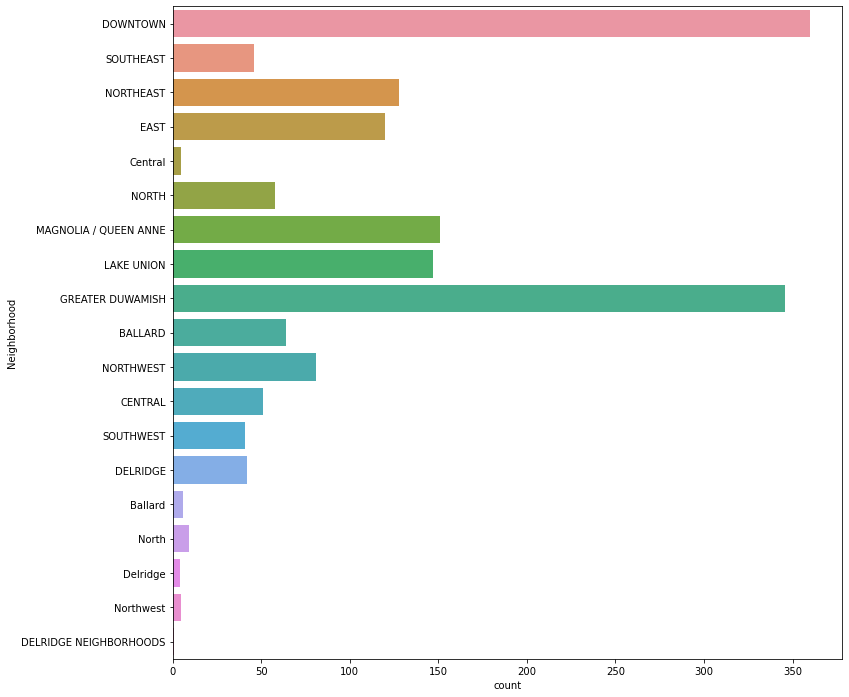

In [91]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2016['Neighborhood'])

Cette variable pourrait également servir afin d'améliorer les modélisations. Cependant, on s'aperçoit qu'on peut regrouper les valeurs en les mettant toutes en majuscules, et regrouper 'DELRIDGE NEIGHBORHOODS' avec 'DELRIDGE'.

In [92]:
df_2016['Neighborhood'] = df_2016['Neighborhood'].apply(lambda x: x.upper())
df_2016.loc[df_2016['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

<ipython-input-92-aebe5bef588e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Neighborhood'] = df_2016['Neighborhood'].apply(lambda x: x.upper())
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

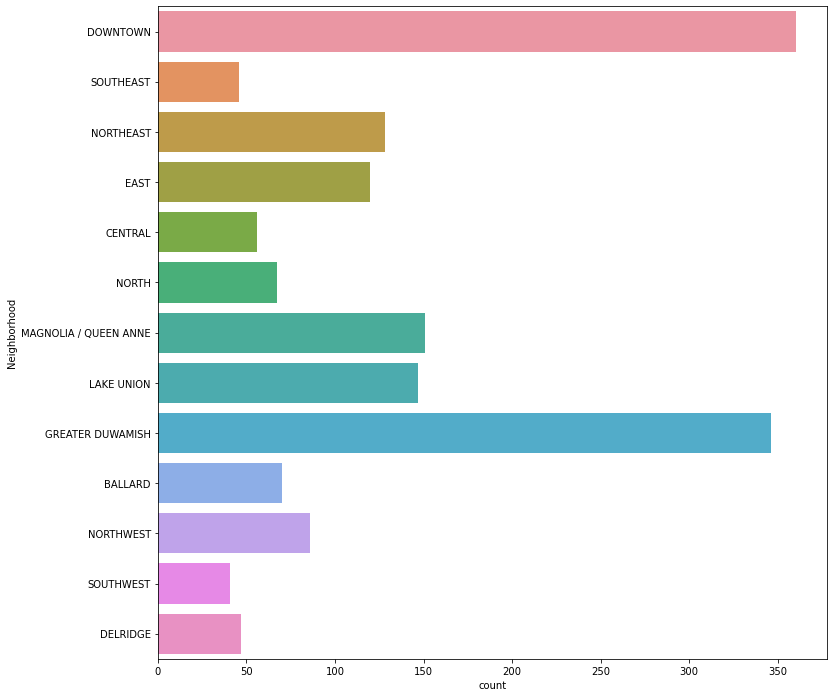

In [93]:
plt.figure(figsize=(12,12))
sns.countplot(y=df_2016['Neighborhood'])

In [94]:
quali = ['PrimaryPropertyType', 'LargestPropertyUseType', 'Neighborhood']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/

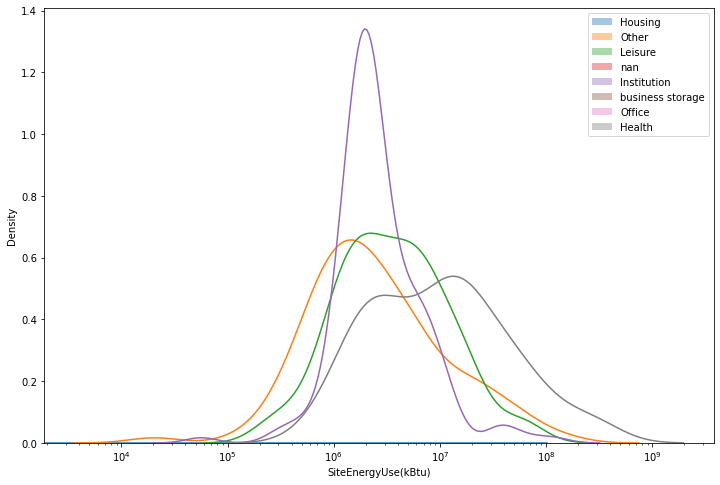

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/

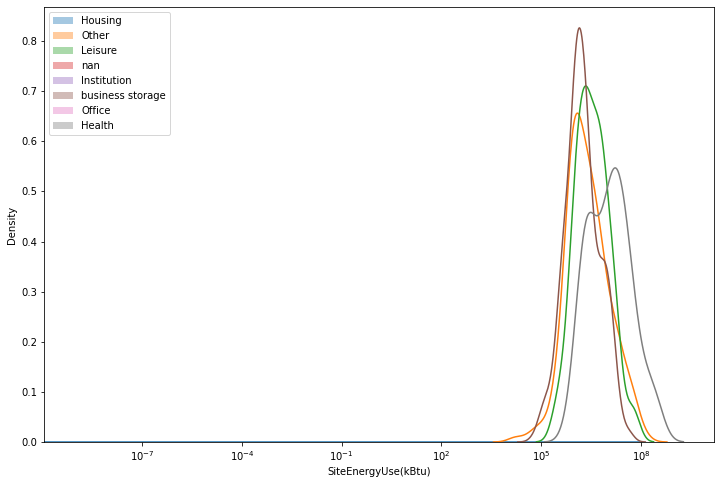

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/

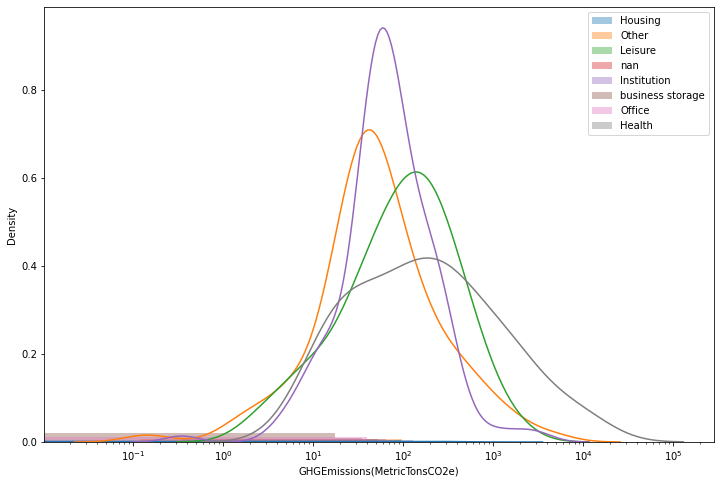

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10


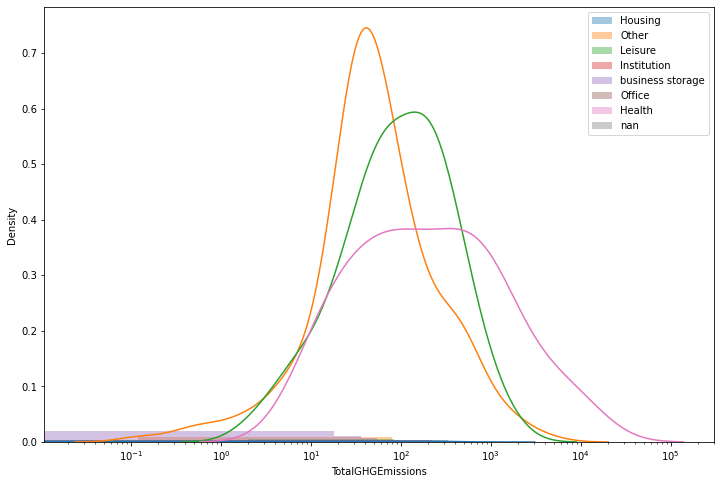

In [95]:
plt.figure(figsize=(12,8))
for typ in df_2015['LargestPropertyUseType'].unique():
    sns.distplot(df_2015[df_2015['LargestPropertyUseType'] == typ][target1], label=typ)
    plt.xscale('log')
    plt.legend()
plt.show()    

plt.figure(figsize=(12,8))
for typ in df_2015['LargestPropertyUseType'].unique():
    sns.distplot(df_2016[df_2016['LargestPropertyUseType'] == typ][target1], label=typ)
    plt.xscale('log')
    plt.legend()
plt.show()    

plt.figure(figsize=(12,8))    
for typ in df_2015['LargestPropertyUseType'].unique():
    sns.distplot(df_2015[df_2015['LargestPropertyUseType'] == typ][target2], label=typ)
    plt.xscale('log')
    plt.legend()
plt.show()    

plt.figure(figsize=(12,8))    
for typ in df_2016['LargestPropertyUseType'].unique():
    sns.distplot(df_2016[df_2016['LargestPropertyUseType'] == typ][target3], label=typ)
    plt.xscale('log')
    plt.legend()
plt.show()

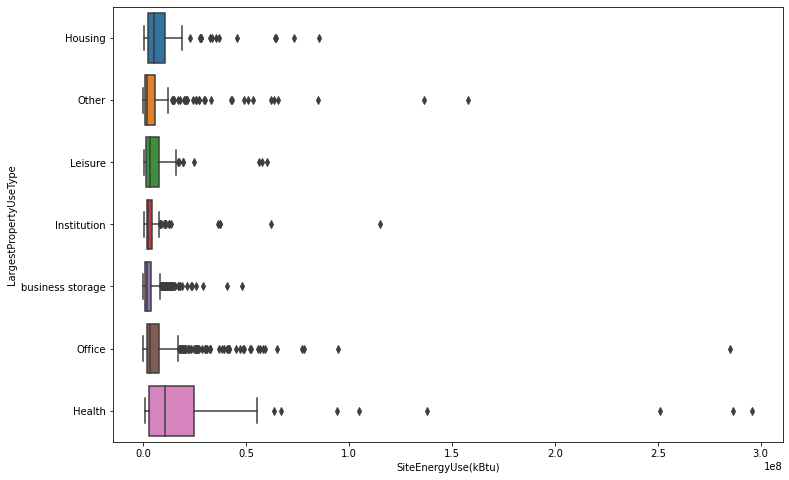

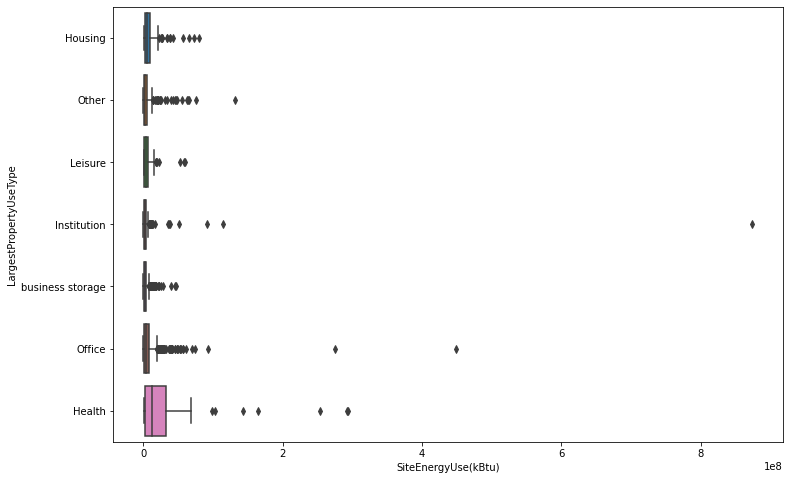

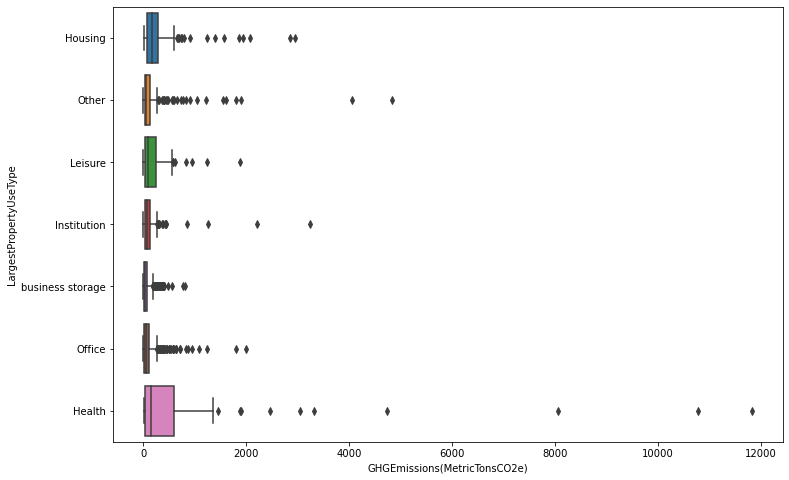

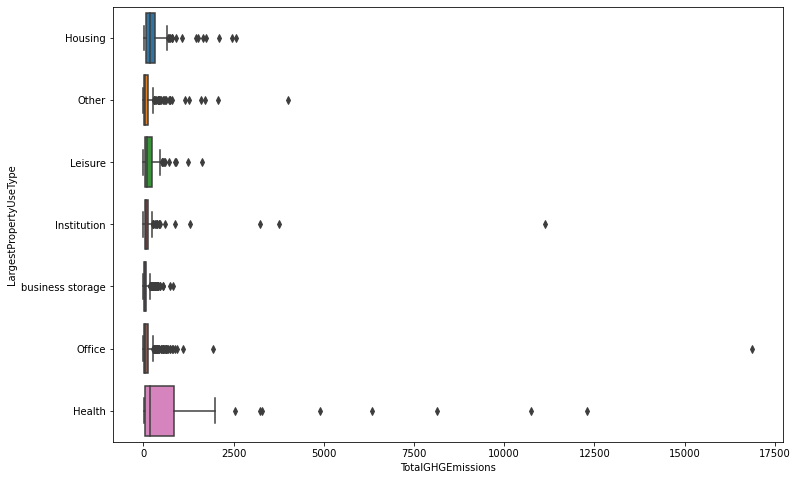

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x=target1, y='LargestPropertyUseType', data=df_2015)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x=target1, y='LargestPropertyUseType', data=df_2016)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x=target2, y='LargestPropertyUseType', data=df_2015)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x=target3, y='LargestPropertyUseType', data=df_2016)
plt.show()
    

### Gestion des Nan (variable catégorielle)

In [97]:
df_2015[df_2015['LargestPropertyUseType'].isna()]['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    13
Retail Store                   10
Large Office                    6
Hotel                           6
Warehouse                       5
Mixed Use Property              5
K-12 School                     4
Other                           3
Medical Office                  2
Worship Facility                2
Distribution Center             2
Restaurant                      1
Laboratory                      1
College/University              1
Refrigerated Warehouse          1
Self-Storage Facility           1
Hospital                        1
Supermarket/Grocery Store       1
Name: PrimaryPropertyType, dtype: int64

In [98]:
for col in df_2015[df_2015['LargestPropertyUseType'].isna()]['PrimaryPropertyType'].unique():
    print(f'{col:-<28}', tuple(df_2015[df_2015['PrimaryPropertyType'] == col]['LargestPropertyUseType'].unique()))

Hotel----------------------- ('Housing', nan)
Distribution Center--------- (nan, 'business storage')
K-12 School----------------- ('Institution', nan)
Large Office---------------- ('Office', nan)
Retail Store---------------- ('business storage', nan)
Small- and Mid-Sized Office- ('Office', nan)
Mixed Use Property---------- ('Leisure', 'Health', 'Housing', 'business storage', 'Office', 'Other', nan, 'Institution')
Laboratory------------------ (nan,)
Self-Storage Facility------- ('business storage', nan)
Other----------------------- ('Other', 'Leisure', 'business storage', 'Office', 'Housing', 'Health', nan, 'Institution')
Warehouse------------------- ('business storage', nan)
Refrigerated Warehouse------ ('business storage', nan)
Medical Office-------------- ('Health', nan)
Worship Facility------------ ('Other', nan)
Supermarket/Grocery Store--- ('business storage', nan)
Restaurant------------------ ('Leisure', nan)
College/University---------- ('Institution', nan)
Hospital-------------

In [99]:
def Nan_UseType(df):
    
    mapping_nan_type={'Hotel':'Housing',

                           'Other':'Other',
                           'Mixed Use Property':'Other',
                           'Worship Facility':'Other',

                           'Restaurant':'Leisure',       

                           'K-12 School':'Institution',
                           'College/University':'Institution',                       

                           'Self-Storage Facility':'business storage',
                           'Retail Store':'business storage',
                           'Distribution Center':'business storage',
                           'Supermarket/Grocery Store':'business storage',
                           'Refrigerated Warehouse':'business storage',
                           'Warehouse':'business storage',                                       

                           'Medical Office':'Health',
                           'Laboratory':'Health',
                           'Hospital':'Health',                       

                           'Small- and Mid-Sized Office':'Office',
                           'Large Office':'Office'}


    
    df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna(df['PrimaryPropertyType'].map(mapping_nan_type))
    
    return df

In [100]:
Nan_UseType(df_2015)

<ipython-input-99-b92bcdfd3c32>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna(df['PrimaryPropertyType'].map(mapping_nan_type))


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Housing,88434.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,Compliant,14.0,31.0,18081
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Housing,83880.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,Compliant,14.0,31.0,18081
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Housing,757243.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Compliant,56.0,31.0,18081
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Housing,61320.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,Compliant,56.0,31.0,18081
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Housing,123445.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,Compliant,56.0,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,49966,2015,NonResidential,Other,2,SOUTHEAST,2009,1,NaN,40265,0,40265,Pre-school/Daycare,Institution,40265.0,48.6,54.1,120.3,127.2,1957356.0,2176523.0,0.0,391024.0,1334228.0,6232.0,623184.0,0.0,42.40,0.91,Compliant,22.0,37.0,18388
3314,49985,2015,NonResidential,Large Office,7,LAKE UNION,2014,1,6.0,427181,169195,257986,"Office, Parking",Office,427181.0,39.2,40.7,113.0,115.8,16730779.0,17371762.0,0.0,4306088.0,14692982.0,20384.0,2038408.0,0.0,210.69,0.35,Compliant,56.0,7.0,18390
3319,49998,2015,NonResidential,Self-Storage Facility,2,SOUTHEAST,2014,1,4.0,101580,14004,87576,Self-Storage Facility,business storage,87576.0,9.7,9.7,27.2,27.2,850568.0,850568.0,0.0,208197.0,710399.0,1402.0,140199.0,0.0,12.40,0.09,Compliant,38.0,42.0,17919
3322,50002,2015,NonResidential,Other,4,NORTHEAST,2014,1,3.0,33648,84198,-50550,"Automobile Dealership, Parking",Other,83600.0,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,0.0,9.69,0.11,Compliant,60.0,38.0,18383


In [101]:
df_2015['LargestPropertyUseType'].value_counts()

Office              520
business storage    465
Other               211
Institution         169
Housing             124
Leisure              84
Health               75
Name: LargestPropertyUseType, dtype: int64

In [102]:
df_2016[df_2016['LargestPropertyUseType'].isna()]['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    2
Restaurant                     1
Hotel                          1
Mixed Use Property             1
Self-Storage Facility          1
Name: PrimaryPropertyType, dtype: int64

In [103]:
Nan_UseType(df_2016)

<ipython-input-99-b92bcdfd3c32>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LargestPropertyUseType'] = df['LargestPropertyUseType'].fillna(df['PrimaryPropertyType'].map(mapping_nan_type))


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Housing,88434.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83
1,2,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Housing,83880.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86
2,3,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Housing,756493.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19
3,5,2016,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Housing,61320.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67
4,8,2016,NonResidential,Hotel,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Housing,123445.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Other,NaN,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,NaN,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Leisure,16000.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Leisure,7583.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,NaN,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Leisure,6601.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57


In [104]:
df_2016['LargestPropertyUseType'].value_counts()

Office              524
business storage    459
Other               208
Institution         171
Housing             134
Leisure              96
Health               73
Name: LargestPropertyUseType, dtype: int64

### 'ComplianceStatus'

In [105]:
df_2015['ComplianceStatus'].value_counts()

Compliant    1648
Name: ComplianceStatus, dtype: int64

In [106]:
df_2016[df_2016['ComplianceStatus'] != 'Compliant']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,98118.0,2,SOUTHEAST,47.54576,-122.26853,1961,1.0,2,56228,0,56228,K-12 School,Institution,58916.0,26.100000,29.100000,60.700001,64.599998,1.539478e+06,1.713624e+06,0.0,274605.90630,9.369550e+05,6025.229004,6.025230e+05,Error - Correct Default Data,38.53,0.69
28,34,2016,SPS-District K-12,K-12 School,98112.0,3,CENTRAL,47.62266,-122.30547,1955,1.0,1,126351,0,126351,K-12 School,Institution,126351.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.00000,0.000000e+00,0.000000,0.000000e+00,Missing Data,0.00,0.00
30,36,2016,SPS-District K-12,K-12 School,98125.0,5,NORTH,47.70994,-122.29301,1949,1.0,2,160645,0,160645,K-12 School,Institution,164229.0,41.299999,47.500000,68.099998,75.699997,6.779173e+06,7.800350e+06,0.0,570809.18750,1.947601e+06,48315.718750,4.831572e+06,Error - Correct Default Data,270.18,1.68
31,37,2016,SPS-District K-12,K-12 School,98109.0,7,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,0,51582,K-12 School,Institution,55166.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,438691.68750,1.496816e+06,0.000000,0.000000e+00,Missing Data,10.43,0.20
38,51,2016,SPS-District K-12,K-12 School,98115.0,4,NORTHEAST,47.68252,-122.29498,1950,1.0,2,175565,0,175565,K-12 School,Institution,182861.0,35.000000,40.099998,55.000000,60.400002,6.399128e+06,7.329818e+06,0.0,468840.50000,1.599684e+06,47994.433590,4.799443e+06,Error - Correct Default Data,266.05,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,43948,2016,Nonresidential COS,Other,98108.0,2,GREATER DUWAMISH,47.54277,-122.31626,1906,1.0,2,39212,0,39212,Other,Other,39212.0,1.800000,1.800000,5.800000,5.800000,7.237040e+04,7.237040e+04,0.0,21210.59961,7.237100e+04,0.000000,0.000000e+00,Non-Compliant,0.50,0.01
3166,49703,2016,SPS-District K-12,K-12 School,98199.0,7,MAGNOLIA / QUEEN ANNE,47.64342,-122.39970,1952,1.0,1,116101,0,116101,K-12 School,Institution,119685.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.00000,0.000000e+00,49936.195310,4.993620e+06,Missing Data,265.21,2.28
3366,50210,2016,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,Office,Office,13661.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.000000e+00,Error - Correct Default Data,3.50,0.26
3369,50220,2016,Nonresidential COS,Other,NaN,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,0,15398,Office,Office,15398.0,25.200001,26.900000,64.099998,66.699997,3.878100e+05,4.141724e+05,0.0,81341.39844,2.775369e+05,1102.729980,1.102730e+05,Error - Correct Default Data,7.79,0.51


In [107]:
df_2016['ComplianceStatus'].value_counts()

Compliant                       1546
Error - Correct Default Data      88
Non-Compliant                     17
Missing Data                      14
Name: ComplianceStatus, dtype: int64

Nous allons dans un premier temps conserver toutes ces données, sans forcément garder la variable.

In [108]:
df_2015['PropertyGFATotal'].nsmallest()

1042    20000
2215    20000
1598    20022
789     20028
2835    20039
Name: PropertyGFATotal, dtype: int64

In [109]:
df_2016['PropertyGFATotal'].nsmallest(15)

3363    11285
3361    11685
3362    11968
3371    12294
3365    12769
3373    13157
3366    13661
3374    14101
3369    15398
3372    16000
2246    16300
3364    16795
3375    18258
3370    18261
1030    20000
Name: PropertyGFATotal, dtype: int64

L'étude ne concerne que les bâtiments de plus de 20 000 ft square.
Or, il y a 14 bâtiments dans le tableau de données de 2016 qui ont des surfaces inférieures.

In [110]:
df_2016.loc[df_2016['PropertyGFATotal'].nsmallest(15).index,:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3363,50204,2016,Nonresidential COS,Other,NaN,5,NORTH,47.72126,-122.29735,1949,1.0,1,11285,0,11285,Prison/Incarceration,Other,11285.0,57.200001,62.599998,140.000000,148.399994,6.456654e+05,7.059837e+05,0.0,126552.00000,4.317954e+05,2138.700195,2.138700e+05,Compliant,14.37,1.27
3361,50198,2016,Nonresidential COS,Other,NaN,3,CENTRAL,47.59905,-122.29787,2013,1.0,1,11685,0,11685,Prison/Incarceration,Other,11685.0,72.800003,82.900002,138.600006,149.199997,8.510538e+05,9.691420e+05,0.0,101784.50000,3.472887e+05,5037.649902,5.037650e+05,Compliant,29.18,2.50
3362,50201,2016,Nonresidential COS,Other,NaN,6,BALLARD,47.69330,-122.37717,2010,1.0,1,11968,0,11968,Prison/Incarceration,Other,11968.0,65.500000,71.800003,139.199997,149.000000,7.834230e+05,8.587730e+05,0.0,118183.79690,4.032431e+05,3801.799805,3.801800e+05,Compliant,23.00,1.92
3371,50222,2016,Nonresidential COS,Other,NaN,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.00000,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
3365,50208,2016,Nonresidential COS,Other,NaN,6,BALLARD,47.67734,-122.37624,1972,1.0,1,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other ...",Leisure,10912.0,400.799988,420.600006,618.099976,638.900024,5.117308e+06,5.370264e+06,0.0,353216.09380,1.205173e+06,39121.351560,3.912135e+06,Compliant,216.18,16.93
3373,50224,2016,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Leisure,7583.0,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,525251.68750,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
3366,50210,2016,Nonresidential COS,Other,NaN,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,Office,Office,13661.0,36.799999,40.900002,115.500000,128.399994,5.026677e+05,5.585251e+05,0.0,147323.50000,5.026678e+05,0.000000,0.000000e+00,Error - Correct Default Data,3.50,0.26
3374,50225,2016,Nonresidential COS,Mixed Use Property,NaN,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Leisure,6601.0,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.00000,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57
3369,50220,2016,Nonresidential COS,Other,NaN,2,SOUTHEAST,47.56440,-122.27813,1960,1.0,1,15398,0,15398,Office,Office,15398.0,25.200001,26.900000,64.099998,66.699997,3.878100e+05,4.141724e+05,0.0,81341.39844,2.775369e+05,1102.729980,1.102730e+05,Error - Correct Default Data,7.79,0.51
3372,50223,2016,Nonresidential COS,Other,NaN,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Leisure,16000.0,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,116221.00000,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01


Nous choisissons donc ici de ne pas prendre ces bâtiments en compte, car il peut aussi s'agir d'erreur lors du renseignement des surfaces.

In [111]:
df_2016 = df_2016[df_2016['PropertyGFATotal'] >= 20000]

In [112]:
df_2015.shape

(1648, 33)

In [113]:
df_2016.shape

(1651, 32)

## Variables quantitatives

### Valeurs entières

In [114]:
df_2015.select_dtypes('int').nunique()

OSEBuildingID             1648
DataYear                     1
CouncilDistrictCode          7
YearBuilt                  112
NumberofBuildings           10
PropertyGFATotal          1572
PropertyGFAParking         339
PropertyGFABuilding(s)    1566
Zip Codes                   29
dtype: int64

In [115]:
df_2016.select_dtypes('int').nunique()

OSEBuildingID             1651
DataYear                     1
CouncilDistrictCode          7
YearBuilt                  113
NumberofFloors              45
PropertyGFATotal          1575
PropertyGFAParking         326
PropertyGFABuilding(s)    1570
dtype: int64

Ce qui va nous intéresser ici sont les variables : 'Year', 'NumberofBuildings', 'NumberofFloors', et les variables de surface (GFA).

In [116]:
df_2016.rename(columns={'ZipCode': 'Zip Codes'}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [117]:
df_2015.shape

(1648, 33)

In [118]:
df_2015 = df_2015.dropna(subset=['NumberofFloors'])
df_2015.shape

(1640, 33)

In [119]:
df_2016.shape

(1651, 32)

In [120]:
df_2016 = df_2016.dropna(subset=['NumberofBuildings'])
df_2016.shape

(1649, 32)

In [121]:
df_2015['NumberofFloors'] = df_2015['NumberofFloors'].astype(int)

<ipython-input-121-ccdb24a92d67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['NumberofFloors'] = df_2015['NumberofFloors'].astype(int)


In [122]:
df_2016['NumberofBuildings'] = df_2016['NumberofBuildings'].astype(int)

In [123]:
df_2015.select_dtypes('int').nunique()

OSEBuildingID             1640
DataYear                     1
CouncilDistrictCode          7
YearBuilt                  112
NumberofBuildings            9
NumberofFloors              45
PropertyGFATotal          1565
PropertyGFAParking         339
PropertyGFABuilding(s)    1559
Zip Codes                   29
dtype: int64

In [124]:
df_2016.select_dtypes('int').nunique()

OSEBuildingID             1649
DataYear                     1
CouncilDistrictCode          7
YearBuilt                  113
NumberofBuildings           16
NumberofFloors              45
PropertyGFATotal          1573
PropertyGFAParking         326
PropertyGFABuilding(s)    1568
dtype: int64

### Valeurs quantitatives (float)

In [125]:
def rate(df, rate):
    df[str(rate + '_rate')] = round(df[rate] / df[target1], 3)
    return df

In [126]:
energies = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']

In [127]:
max(0.0,1-2.5)

0.0

In [138]:
for energy in energies :
    rate(df_2015, energy)

df_2015['other_rate'] = round(1 - (df_2015[energies].sum(axis=1) / df_2015[target1]), 3)

for energy in energies :
    rate(df_2016, energy)

df_2016['other_rate'] = round(1 - (df_2016[energies].sum(axis=1) / df_2016[target1]), 3)


<ipython-input-125-cb4c914bbee8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(rate + '_rate')] = round(df[rate] / df[target1], 3)
<ipython-input-138-9f7eb1aa2430>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['other_rate'] = round(1 - (df_2015[energies].sum(axis=1) / df_2015[target1]), 3)


In [139]:
df_2015['other_rate'] = df_2015['other_rate'].apply(lambda x: max(0.0,x))

<ipython-input-139-f190e9382e9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['other_rate'] = df_2015['other_rate'].apply(lambda x: max(0.0,x))


In [140]:
df_2016['other_rate'] = df_2016['other_rate'].apply(lambda x: max(0,x))

In [142]:
df_2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Zip Codes,Electricity(kBtu)_rate,NaturalGas(kBtu)_rate,SteamUse(kBtu)_rate,other_rate
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1,12,88434,0,88434,Hotel,Housing,88434.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,Compliant,14.0,31.0,18081,0.528,0.182,0.290,0.0
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1,11,103566,15064,88502,"Hotel, Parking, Restaurant",Housing,83880.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,Compliant,14.0,31.0,18081,0.467,0.533,0.000,0.0
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1,41,961990,0,961990,"Hotel, Parking, Swimming Pool",Housing,757243.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Compliant,56.0,31.0,18081,0.680,0.051,0.269,0.0
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1,10,61320,0,61320,Hotel,Housing,61320.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,Compliant,56.0,31.0,18081,0.098,0.071,0.831,0.0
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1,18,119890,12460,107430,"Hotel, Parking, Swimming Pool",Housing,123445.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,Compliant,56.0,31.0,19576,0.409,0.591,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,49946,2015,NonResidential,Supermarket/Grocery Store,6,BALLARD,2010,1,8,41198,0,41198,Supermarket/Grocery Store,business storage,41198.0,167.0,167.0,494.3,494.3,6879291.0,6879291.0,0.0,1842623.0,6287291.0,5923.0,592260.0,0.0,75.28,1.17,Compliant,4.0,1.0,18386,0.914,0.086,0.000,0.0
3314,49985,2015,NonResidential,Large Office,7,LAKE UNION,2014,1,6,427181,169195,257986,"Office, Parking",Office,427181.0,39.2,40.7,113.0,115.8,16730779.0,17371762.0,0.0,4306088.0,14692982.0,20384.0,2038408.0,0.0,210.69,0.35,Compliant,56.0,7.0,18390,0.878,0.122,0.000,0.0
3319,49998,2015,NonResidential,Self-Storage Facility,2,SOUTHEAST,2014,1,4,101580,14004,87576,Self-Storage Facility,business storage,87576.0,9.7,9.7,27.2,27.2,850568.0,850568.0,0.0,208197.0,710399.0,1402.0,140199.0,0.0,12.40,0.09,Compliant,38.0,42.0,17919,0.835,0.165,0.000,0.0
3322,50002,2015,NonResidential,Other,4,NORTHEAST,2014,1,3,33648,84198,-50550,"Automobile Dealership, Parking",Other,83600.0,35.6,35.6,111.9,111.9,1389553.0,1389553.0,0.0,407255.0,1389610.0,0.0,0.0,0.0,9.69,0.11,Compliant,60.0,38.0,18383,1.000,0.000,0.000,0.0


In [143]:
energies_rate = ['Electricity(kBtu)_rate', 'NaturalGas(kBtu)_rate', 'SteamUse(kBtu)_rate', 'other_rate']

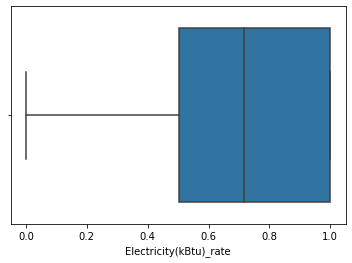

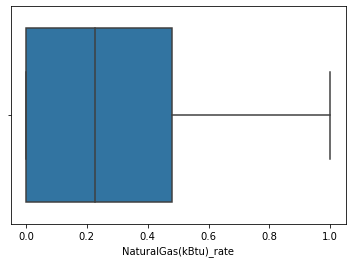

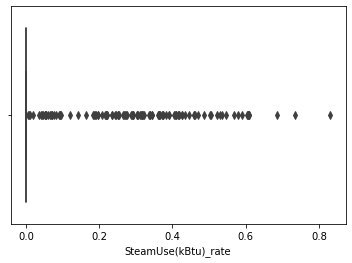

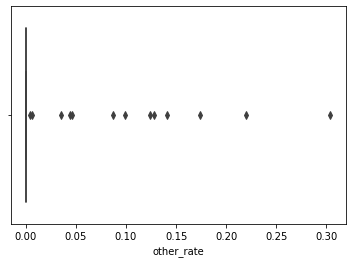

In [144]:
for energy_rate in energies_rate:
    sns.boxplot(df_2015[energy_rate])
    plt.show()

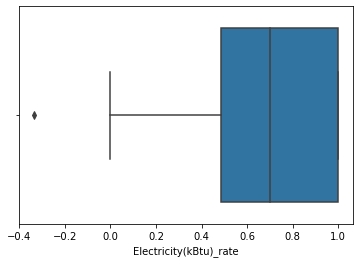

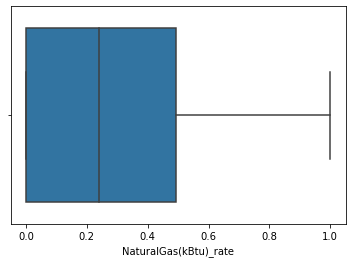

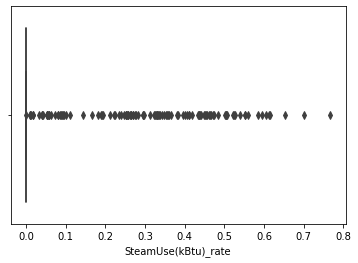

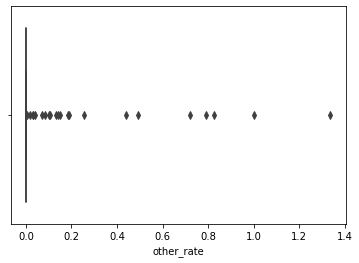

In [145]:
for energy_rate in energies_rate:
    sns.boxplot(df_2016[energy_rate])
    plt.show()

On remarque quelques valeurs aberrantes (négatives) pour les énergies. 
Il faudra supprimer ces outliers.

In [146]:
df_2015.select_dtypes('float').nunique()

LargestPropertyUseTypeGFA                                        1479
SiteEUI(kBtu/sf)                                                  967
SiteEUIWN(kBtu/sf)                                                984
SourceEUI(kBtu/sf)                                               1288
SourceEUIWN(kBtu/sf)                                             1260
SiteEnergyUse(kBtu)                                              1631
SiteEnergyUseWN(kBtu)                                            1623
SteamUse(kBtu)                                                    115
Electricity(kWh)                                                 1632
Electricity(kBtu)                                                1632
NaturalGas(therms)                                               1135
NaturalGas(kBtu)                                                 1166
OtherFuelUse(kBtu)                                                 16
GHGEmissions(MetricTonsCO2e)                                     1558
GHGEmissionsIntensit

In [147]:
df_2016.select_dtypes('float').nunique()

Zip Codes                      48
Latitude                     1480
Longitude                    1390
LargestPropertyUseTypeGFA    1546
SiteEUI(kBtu/sf)              954
SiteEUIWN(kBtu/sf)            968
SourceEUI(kBtu/sf)           1259
SourceEUIWN(kBtu/sf)         1299
SiteEnergyUse(kBtu)          1634
SiteEnergyUseWN(kBtu)        1623
SteamUse(kBtu)                115
Electricity(kWh)             1638
Electricity(kBtu)            1638
NaturalGas(therms)           1174
NaturalGas(kBtu)             1174
TotalGHGEmissions            1581
GHGEmissionsIntensity         459
Electricity(kBtu)_rate        644
NaturalGas(kBtu)_rate         626
SteamUse(kBtu)_rate           110
other_rate                     23
dtype: int64

In [148]:
quanti = ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
          'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA'] + energies_rate

In [149]:
quanti

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'Electricity(kBtu)_rate',
 'NaturalGas(kBtu)_rate',
 'SteamUse(kBtu)_rate',
 'other_rate']

In [150]:
col_2016 = df_2016.columns.tolist()

In [151]:
col_2016[col_2016.index(target3)] = target2

In [152]:
df_2016.columns = col_2016

In [153]:
targets = [target1, target2]

In [154]:
df_2015[targets + quali + quanti].isna().sum()

SiteEnergyUse(kBtu)              7
GHGEmissions(MetricTonsCO2e)     7
PrimaryPropertyType              0
LargestPropertyUseType           0
Neighborhood                     0
YearBuilt                        0
NumberofBuildings                0
NumberofFloors                   0
PropertyGFATotal                 0
PropertyGFAParking               0
PropertyGFABuilding(s)           0
LargestPropertyUseTypeGFA       65
Electricity(kBtu)_rate           9
NaturalGas(kBtu)_rate            9
SteamUse(kBtu)_rate              9
other_rate                       0
dtype: int64

In [155]:
df_2015[targets + quali + quanti].duplicated().sum()

0

In [156]:
df_2016[targets + quali + quanti].isna().sum()

SiteEnergyUse(kBtu)              0
GHGEmissions(MetricTonsCO2e)     0
PrimaryPropertyType              0
LargestPropertyUseType           0
Neighborhood                     0
YearBuilt                        0
NumberofBuildings                0
NumberofFloors                   0
PropertyGFATotal                 0
PropertyGFAParking               0
PropertyGFABuilding(s)           0
LargestPropertyUseTypeGFA        4
Electricity(kBtu)_rate           9
NaturalGas(kBtu)_rate           12
SteamUse(kBtu)_rate             16
other_rate                       0
dtype: int64

In [157]:
df_2016[targets + quali + quanti].duplicated().sum()

0

In [158]:
df = pd.concat([df_2015[targets + quali + quanti],
               df_2016[targets + quali + quanti]])

In [159]:
df.duplicated().sum()

0

In [160]:
df.describe()

,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,Electricity(kBtu)_rate,NaturalGas(kBtu)_rate,SteamUse(kBtu)_rate,other_rate
count,3.282000e+03,3282.000000,3289.000000,3289.000000,3289.000000,3.289000e+03,3289.000000,3.289000e+03,3.220000e+03,3271.0000,3268.0000,3264.000000,3289.000000
mean,8.104052e+06,177.674677,1961.543934,1.113712,4.141988,1.161537e+05,13409.629675,1.027440e+05,9.566470e+04,inf,inf,0.021246,0.002601
std,2.534823e+07,668.933040,32.700271,2.221157,6.584901,2.519600e+05,43769.312492,2.348413e+05,2.280817e+05,NaN,NaN,0.091079,0.040913
min,0.000000e+00,-0.800000,1900.000000,0.000000,0.000000,2.000000e+04,-2.000000,-5.055000e+04,5.656000e+03,-0.3370,0.0000,0.000000,0.000000
25%,1.231865e+06,19.737500,1930.000000,1.000000,1.000000,2.974000e+04,0.000000,2.860000e+04,2.558000e+04,0.4965,0.0000,0.000000,0.000000
50%,2.522574e+06,49.285000,1965.000000,1.000000,2.000000,4.968000e+04,0.000000,4.767300e+04,4.348400e+04,0.7090,0.2365,0.000000,0.000000
75%,6.961781e+06,139.147500,1989.000000,1.000000,4.000000,1.051000e+05,0.000000,9.471300e+04,9.036300e+04,1.0000,0.4860,0.000000,0.000000
max,8.739237e+08,16870.980000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,inf,inf,0.831000,1.337000


In [161]:
df.shape

(3289, 16)

In [223]:
for col in df.select_dtypes('float'):
    df = df[df[col] >= 0]
for col in df.select_dtypes('int'):
    df = df[df[col] >= 0]    

In [224]:
df.describe()

,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,Electricity(kBtu)_rate,NaturalGas(kBtu)_rate,SteamUse(kBtu)_rate,other_rate
count,3.191000e+03,3191.000000,3191.000000,3191.000000,3191.000000,3.191000e+03,3191.000000,3.191000e+03,3.191000e+03,3191.000000,3191.000000,3191.000000,3191.000000
mean,8.146694e+06,178.119699,1961.516766,1.115011,4.150110,1.161288e+05,13426.982137,1.027018e+05,9.558773e+04,0.701333,0.275895,0.020889,0.002262
std,2.561404e+07,674.207869,32.787120,2.252466,6.620361,2.538426e+05,43982.708981,2.365596e+05,2.284183e+05,0.261419,0.262360,0.090150,0.034158
min,1.144100e+04,0.000000,1900.000000,0.000000,0.000000,2.000000e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,0.000000,0.000000
25%,1.245556e+06,19.965000,1930.000000,1.000000,1.000000,2.962500e+04,0.000000,2.858400e+04,2.554700e+04,0.495000,0.000000,0.000000,0.000000
50%,2.547582e+06,49.580000,1965.000000,1.000000,2.000000,4.924300e+04,0.000000,4.723700e+04,4.333600e+04,0.707000,0.238000,0.000000,0.000000
75%,6.962845e+06,139.225000,1989.000000,1.000000,4.000000,1.049805e+05,0.000000,9.447100e+04,9.038100e+04,1.000000,0.488000,0.000000,0.000000
max,8.739237e+08,16870.980000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,1.000000,1.000000,0.831000,1.000000


In [225]:
df.shape

(3191, 16)

### Target / BuildingType

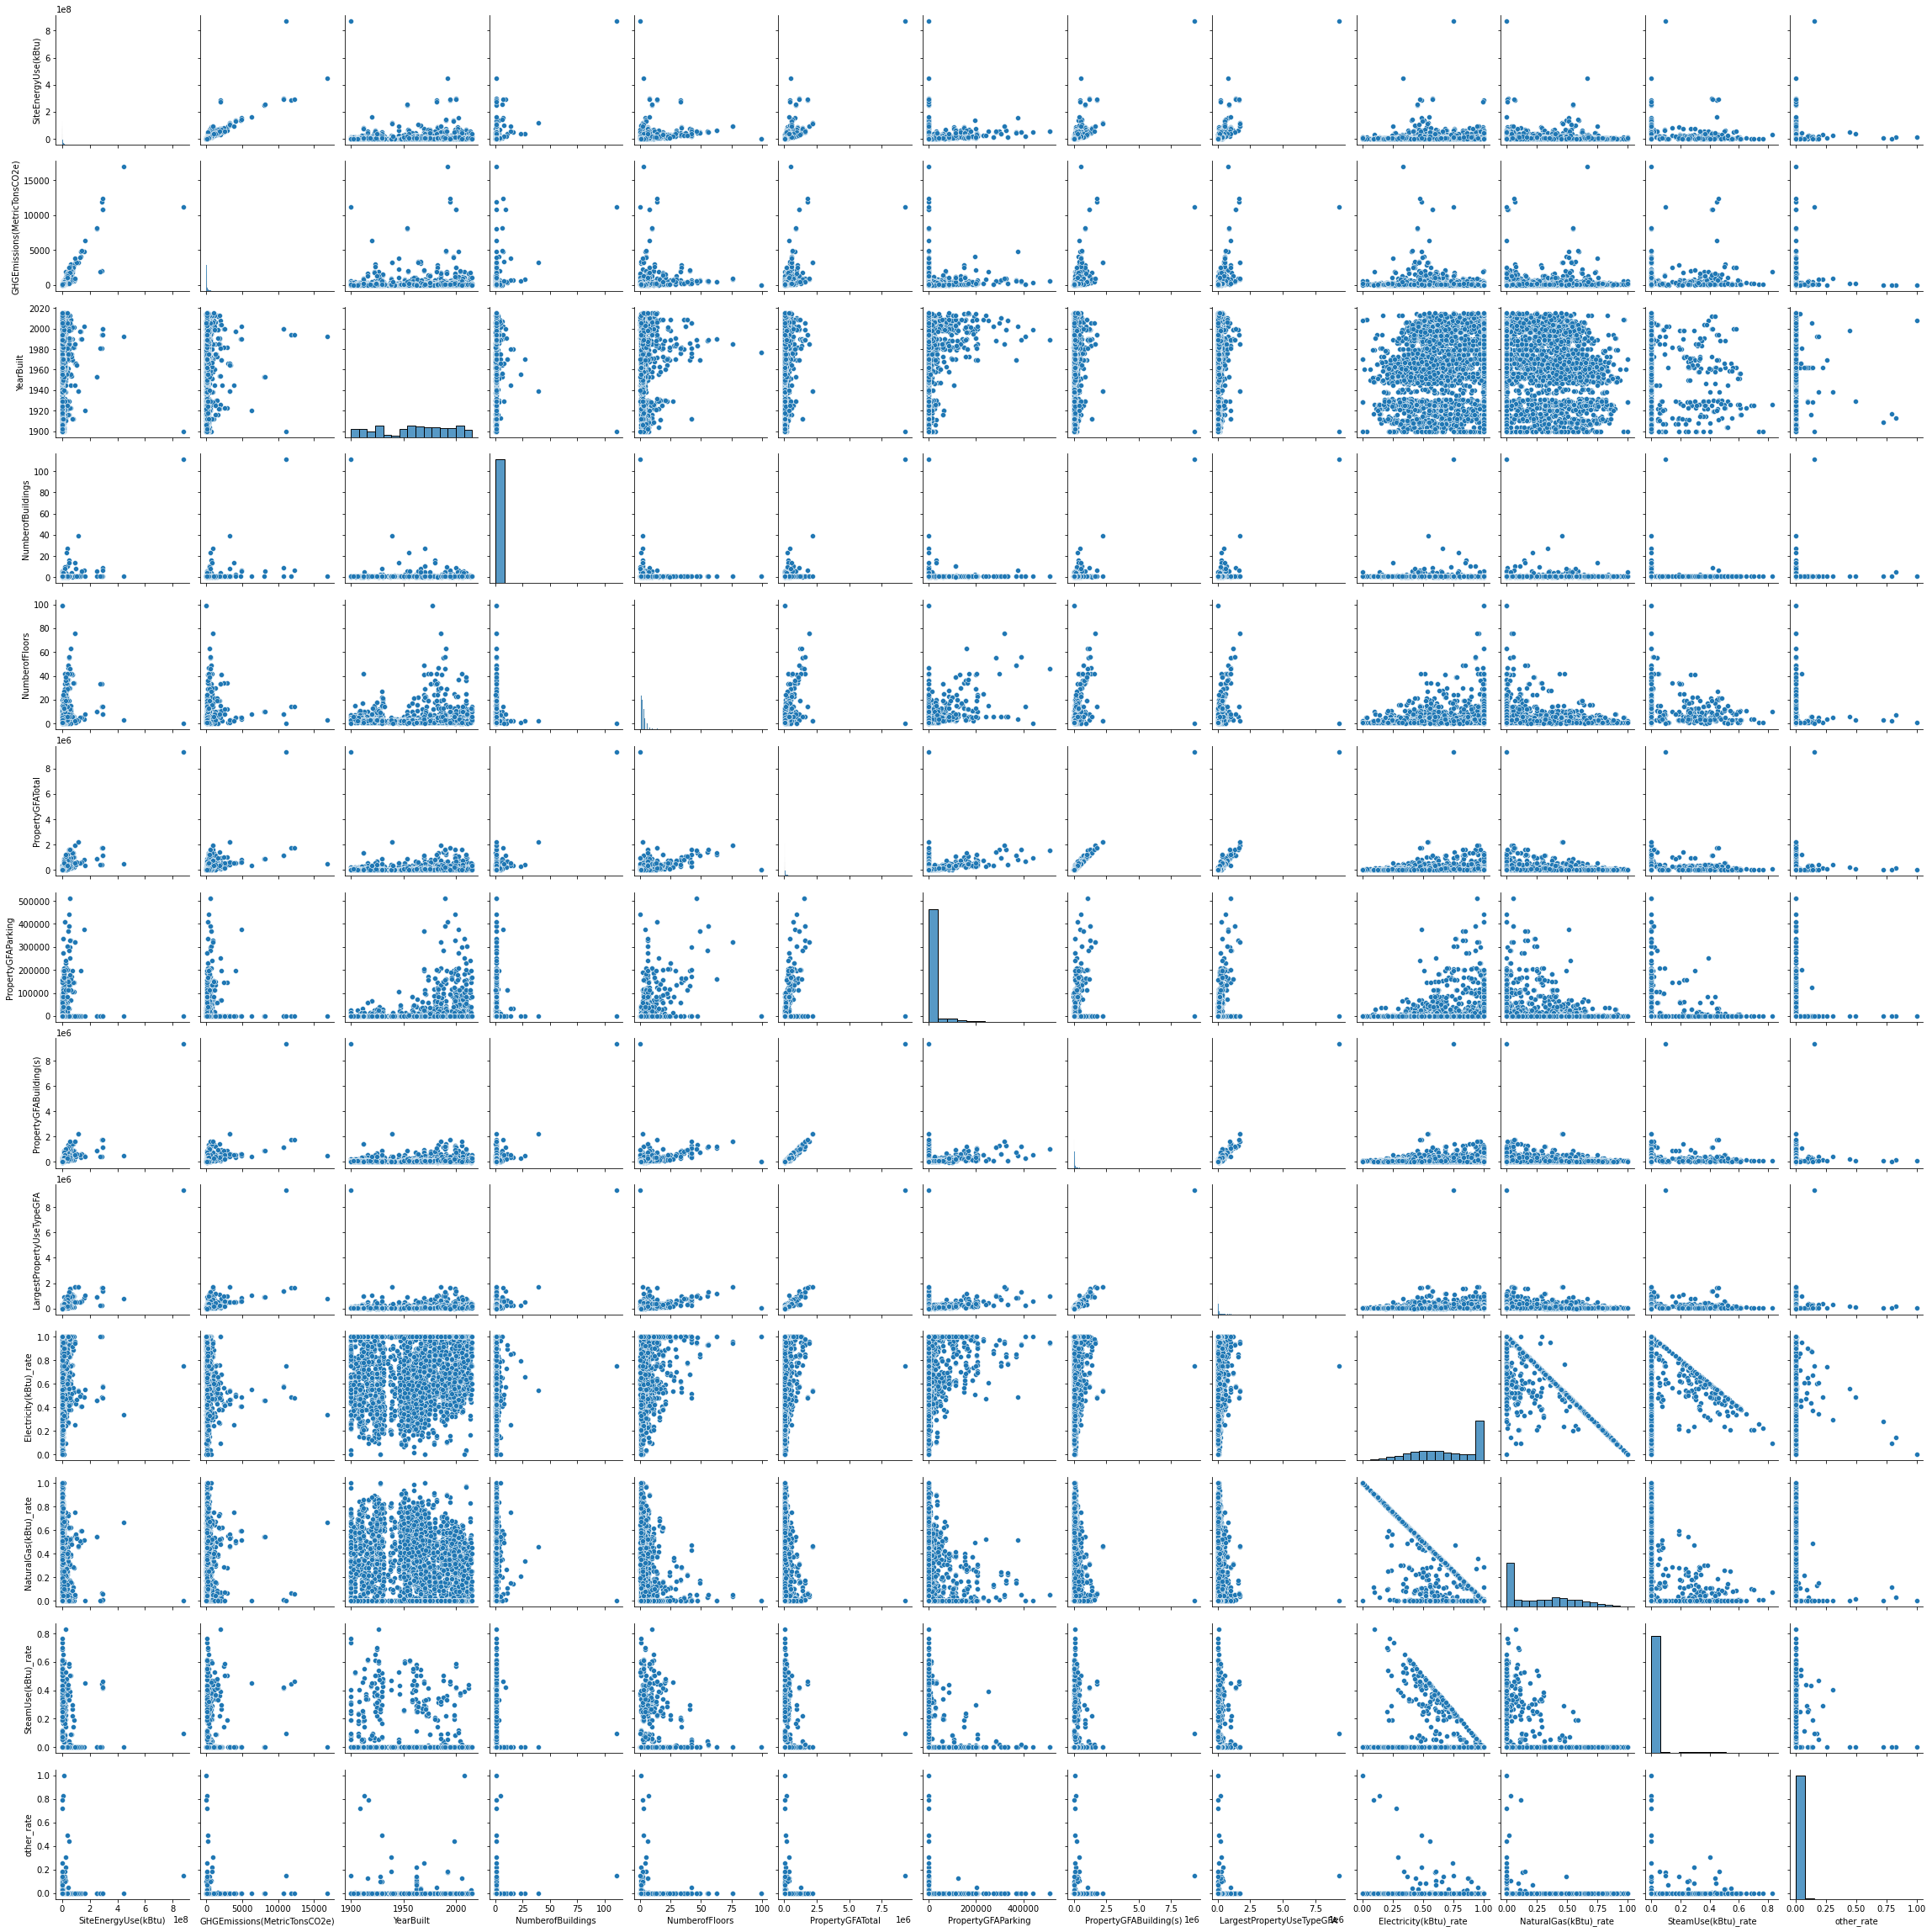

In [165]:
sns.pairplot(df)

<AxesSubplot:>

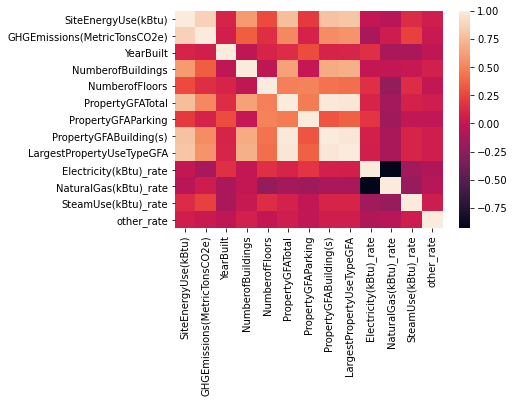

In [166]:
sns.heatmap(df.corr())

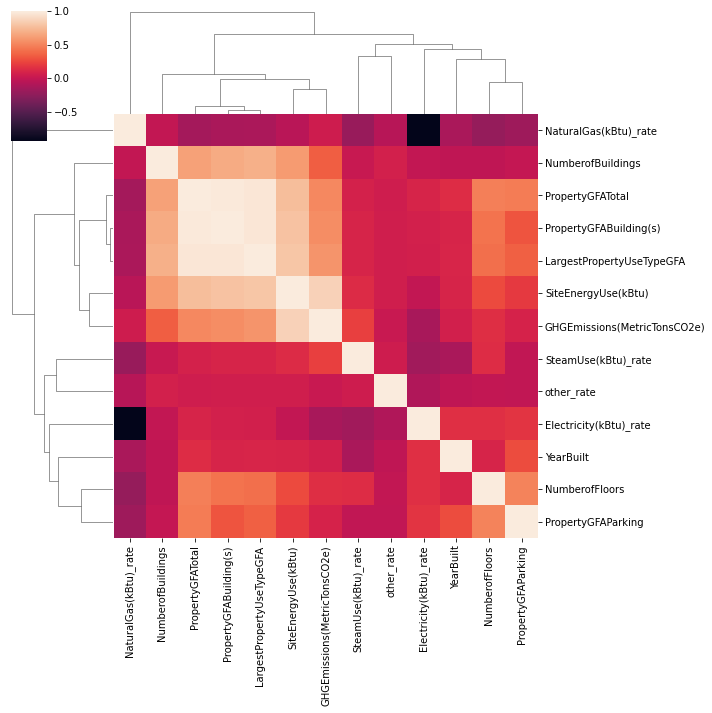

In [168]:
sns.clustermap(df.corr())